In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Project : Not yet concluded

# Project Description

This dataset, compiled by CCAPS, provides data on literacy rates, primary and secondary school attendance rates, access to improved water and sanitation, household access to electricity, and household ownership of radio and television at the subnational level, specifically the first administrative district level. An earlier version of the dataset required users to perform the join in ArcGIS between published shape files and data files. This version includes shape files with the data already joined. For those administrative regions with missing data, this is indicated with a value of -99999. The user must exclude these values before visualizing or analyzing the data.

# Outlines:
- [Data Loading and Inspection](#Task1)
- [Data Cleaning](#Task2)
- [Data Visualization](#Task3)
- [Data Analysis](#Task4)
- [Feature Engineering](#Task5)
- [Model Training and Testing](#Task6)
- [Data Interpretation](#Task7)

## Data Loading and Inspection <a name="Task1"></a>

In [2]:
# import all necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
px.defaults.height = 600
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/Hamoye Project/Subnational African Data_Aug.19.2013.xls')

In [ ]:
# display any 5 random rows from the dataset.
df.sample(5)

Country name ISO code  ISO numeric code Subnational region name  \
460         Togo      TGO               768                Plateaux   
276      Nigeria      NGA               566                     Oyo   
226      Namibia      NAM               516                  Erongo   
340       Uganda      UGA               800            East Central   
137      Liberia      LBR               430                    Lofa   

     CCAPS subnational region ID  Year Data Source  \
460                       768005  2006        MICS   
276                       566031  2008         DHS   
226                       516002  2007         DHS   
340                       800003  2011         DHS   
137                       430008  2007         DHS   

                        Website  Net primary attendance rate (%)  \
460  www.unicef.org/statistics/                        95.512596   
276          www.measuredhs.com                        65.368614   
226          www.measuredhs.com                        83.677589   
340          www.measuredhs.com                        84.522858   
137          www.measuredhs.com                        22.490295   

     Primary NAR standard error  ...  Electricity (% of hh) sample size  \
460                    0.885136  ...                             1191.0   
276                    5.074837  ...                              967.0   
226                    2.339184  ...                              762.0   
340                    1.150284  ...                              911.0   
137                    2.696423  ...                             1210.0   

     Radio in household (% of households)  Radio (% of hh) standard error  \
460                             69.021614                        1.361767   
276                             84.829483                        1.434401   
226                             84.838409                        2.041972   
340                             64.171371                        1.870182   
137                             41.426765                        2.736439   

     Radio (% of hh) sample size  Television in household (% of households)  \
460                       1191.0                                  12.417558   
276                        967.0                                  52.092701   
226                        763.0                                  59.395554   
340                        911.0                                   7.475943   
137                       1208.0                                   0.620332   

     Television (% of hh) standard error  Television (% of hh) sample size  \
460                             0.968033                            1191.0   
276                             6.339798                             965.0   
226                             4.917760                             763.0   
340                             1.036010                             911.0   
137                             0.226691                            1210.0   

     Radio and/or television in household (% of households)  \
460                                          69.271729        
276                                          86.372322        
226                                          89.022408        
340                                          65.502014        
137                                          41.452229        

     Radio and/or TV (% of hh) standard error  \
460                                  1.359961   
276                                  1.394818   
226                                  2.007311   
340                                  1.973407   
137                                  2.762803   

     Radio and/or TV (% of hh) sample size  
460                                 1191.0  
276                                  970.0  
226                                  763.0  
340                                  911.0  
137                                 1211.0  

[5 rows x 68 columns]

In [ ]:
# display all the features present in the dataset
df.columns

Index(['Country name', 'ISO code', 'ISO numeric code',
       'Subnational region name', 'CCAPS subnational region ID', 'Year',
       'Data Source', 'Website', 'Net primary attendance rate (%)',
       'Primary NAR standard error', 'Primary NAR sample size',
       'Gross primary attendance rate (%)', 'Primary GAR standard error',
       'Primary GAR sample size', 'Net secondary attendance rate (%)',
       'Secondary NAR standard error', 'Secondar NAR sample size',
       'Gross secondary attendance rate (%)', 'Secondary GAR standard error',
       'Secondary GAR sample size', 'Literacy rate (15 & over)',
       'Literacy rate (15 & over) standard error',
       'Literacy rate (15 & over) size', 'Literacy rate (15-24)',
       'Literacy rate (15-24) standard error', 'Literacy rate (15-24) size',
       'Literacy rate (15-19)', 'Literacy rate (15-19) standard error',
       'Literacy rate (15-19) size', 'Literacy rate (25-49)',
       'Literacy rate (25-49) standard error', 'Literacy 

In [ ]:
# display numbers of rows/observations and columns/features
f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.'

'The dataset has 471 rows and 68 columns.'

In [ ]:
# display all the unique countries in the country name column
df['Country name'].unique()

array(['Burundi', 'Benin', 'Burkina Faso', 'Cameroon', 'Ethiopia',
       'Congo, Republic of', 'Egypt', 'Ghana', 'Guinea', 'Kenya',
       'Liberia', 'Congo, Democratic Republic of', 'Lesotho',
       'Madagascar', 'Mali', 'Mozambique', 'Malawi', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Sao Tome and Principe', 'Swaziland', 'Tanzania', 'Uganda',
       'Zambia', 'Zimbabwe', 'Central African Republic', 'Djibouti',
       'Gambia', "C\x99te d'Ivoire", 'Mauritania', 'Guinea Bissau',
       'Somalia', 'Togo', 'South Africa'], dtype=object)

In [ ]:
# display the number countries that this dataset covered
f'{len(df["Country name"].unique())} countries'

'38 countries'

In [ ]:
# display the number subnational regions that this dataset covered
f'{len(df["Subnational region name"].unique())} Subnational regions'

'445 Subnational regions'

In [ ]:
# display all the unique years in the Year column
df['Year'].unique()

array([2011, 2006, 2010, 2005, 2008, 2009, 2007, 2003], dtype=int64)

In [ ]:
# display info about all the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 68 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country name                                            471 non-null    object 
 1   ISO code                                                471 non-null    object 
 2   ISO numeric code                                        471 non-null    int64  
 3   Subnational region name                                 471 non-null    object 
 4   CCAPS subnational region ID                             471 non-null    int64  
 5   Year                                                    471 non-null    int64  
 6   Data Source                                             471 non-null    object 
 7   Website                                                 471 non-null    object 
 8   Net primary attendance rate (%)         

In [ ]:
# check for duplicate
df.duplicated().sum()

0

In [ ]:
# check for missing values in the dataset
df.isna().sum()

Country name                                               0
ISO code                                                   0
ISO numeric code                                           0
Subnational region name                                    0
CCAPS subnational region ID                                0
                                                          ..
Television (% of hh) standard error                       10
Television (% of hh) sample size                          10
Radio and/or television in household (% of households)    10
Radio and/or TV (% of hh) standard error                  10
Radio and/or TV (% of hh) sample size                     10
Length: 68, dtype: int64

In [ ]:
# getting the missing values in our dataset and assigning to a variable num_missing_df
num_missing = df.isnull().sum()
num_missing_df = pd.DataFrame(num_missing, columns=['missing_values'])

# viewing the first 50 columns and the percentage of missing values
num_missing_df.head(50)

missing_values
Country name                                                     0
ISO code                                                         0
ISO numeric code                                                 0
Subnational region name                                          0
CCAPS subnational region ID                                      0
Year                                                             0
Data Source                                                      0
Website                                                          0
Net primary attendance rate (%)                                  1
Primary NAR standard error                                       1
Primary NAR sample size                                          1
Gross primary attendance rate (%)                                1
Primary GAR standard error                                       1
Primary GAR sample size                                          1
Net secondary attendance rate (%)                                1
Secondary NAR standard error                                     1
Secondar NAR sample size                                         1
Gross secondary attendance rate (%)                              1
Secondary GAR standard error                                     1
Secondary GAR sample size                                        1
Literacy rate (15 & over)                                      124
Literacy rate (15 & over) standard error                       124
Literacy rate (15 & over) size                                 124
Literacy rate (15-24)                                          124
Literacy rate (15-24) standard error                           124
Literacy rate (15-24) size                                     124
Literacy rate (15-19)                                          124
Literacy rate (15-19) standard error                           124
Literacy rate (15-19) size                                     124
Literacy rate (25-49)                                          124
Literacy rate (25-49) standard error                           124
Literacy rate (25-49) size                                     124
Access to improved water (% of population)                       1
Improved Water (% of pop) standard error                         1
Improved Water (% of pop) sample size                            1
Access to improved sanitation (% of population)                  1
Improved Sanitation (% of pop) standard error                    1
Improved Sanitation (% of pop) sample size                       1
Electricity in household (% of population)                      22
Electricity (% of pop) standard error                           22
Electricity (% of pop) sample size                              22
Radio in household (% of population)                            10
Radio (% of pop) standard error                                 10
Radio (% of pop) sample size                                    10
Television in household (% of population)                       10
Television (% of pop) standard error                            10
Television (% of pop) sample size                               10
Radio and/or Television in household (% of popu...              10
Radio and/or TV (% of pop) standard error                       10
Radio and/or TV (% of pop) sample size                          10

In [ ]:
# viewing the last 18 columns and the percentage of missing values
num_missing_df.tail(18)

missing_values
Access to improved water (% of households)                       1
Improved Water (% of hh) standard error                          1
Improved Water (% of hh) sample size                             1
Access to improved sanitation (% of households)                  1
Improved Sanitation (% of hh) standard error                     1
Improved Sanitation (% of hh) sample size                        1
Electricity in household (% of households)                      22
Electricity (% of hh) standard error                            22
Electricity (% of hh) sample size                               22
Radio in household (% of households)                            10
Radio (% of hh) standard error                                  10
Radio (% of hh) sample size                                     10
Television in household (% of households)                       10
Television (% of hh) standard error                             10
Television (% of hh) sample size                                10
Radio and/or television in household (% of hous...              10
Radio and/or TV (% of hh) standard error                        10
Radio and/or TV (% of hh) sample size                           10

In [ ]:
# checking number of unique values in each column
df.nunique()

Country name                                               38
ISO code                                                   38
ISO numeric code                                           38
Subnational region name                                   445
CCAPS subnational region ID                               471
                                                         ... 
Television (% of hh) standard error                       395
Television (% of hh) sample size                          327
Radio and/or television in household (% of households)    398
Radio and/or TV (% of hh) standard error                  398
Radio and/or TV (% of hh) sample size                     324
Length: 68, dtype: int64

The primary key column in this dataset is CCAPS Subnational region ID

A total of 38 countries is involved in this dataset

In [ ]:
# Display the summary statisticcs of the dataset
df.describe()

ISO numeric code  CCAPS subnational region ID         Year  \
count        471.000000                   471.000000   471.000000   
mean         497.152866                497161.866242  2008.131635   
std          240.493840                240494.277329     2.053455   
min          108.000000                108002.000000  2003.000000   
25%          279.000000                279003.500000  2006.000000   
50%          478.000000                478012.000000  2008.000000   
75%          706.000000                706014.500000  2010.000000   
max          894.000000                894009.000000  2011.000000   

       Net primary attendance rate (%)  Primary NAR standard error  \
count                       470.000000                  470.000000   
mean                         69.950883                    2.544909   
std                          21.433693                    1.352500   
min                           0.883070                    0.502372   
25%                          58.579866                    1.517093   
50%                          77.421120                    2.203969   
75%                          86.091373                    3.332346   
max                          96.317795                    7.193609   

       Primary NAR sample size  Gross primary attendance rate (%)  \
count               470.000000                         470.000000   
mean                971.844681                         102.799593   
std                 936.529013                          31.096263   
min                  71.000000                           2.753213   
25%                 555.500000                          91.004612   
50%                 825.000000                         103.641014   
75%                1176.250000                         123.223074   
max               14398.000000                         187.504471   

       Primary GAR standard error  Primary GAR sample size  \
count                  470.000000               470.000000   
mean                     4.359389              1035.585106   
std                      1.942204               940.250504   
min                      1.029757                71.000000   
25%                      3.078526               638.000000   
50%                      3.877652               875.000000   
75%                      5.425325              1227.750000   
max                     15.330481             14405.000000   

       Net secondary attendance rate (%)  ...  \
count                         470.000000  ...   
mean                           29.586993  ...   
std                            20.701757  ...   
min                             0.000000  ...   
25%                            13.646321  ...   
50%                            24.263889  ...   
75%                            40.819109  ...   
max                            84.347824  ...   

       Electricity (% of hh) sample size  \
count                         449.000000   
mean                         1027.467706   
std                           823.641573   
min                           102.000000   
25%                           731.000000   
50%                           885.000000   
75%                          1133.000000   
max                         12090.000000   

       Radio in household (% of households)  Radio (% of hh) standard error  \
count                            461.000000                      461.000000   
mean                              59.583969                        2.482746   
std                               16.685966                        1.089360   
min                                3.043058                        0.671314   
25%                               47.636208                        1.821142   
50%                               61.827236                        2.266243   
75%                               71.969780                        2.880734   
max                               94.478531                        8.593001   

       Radio (% of hh)

## Data Cleaning <a name="Task2"></a>

In [4]:
# drop all the rows with null values as directed in the project description
clean_data = df.dropna(axis = 0)

All null values have now been removed

In [ ]:
# display numbers of rows/observations and columns/features
f'The dataset has {clean_data.shape[0]} rows and {clean_data.shape[1]} columns.'

'The dataset has 326 rows and 68 columns.'

In [ ]:
# display all the unique countries in the country name column
clean_data['Country name'].unique()

array(['Burundi', 'Burkina Faso', 'Cameroon', 'Ethiopia',
       'Congo, Republic of', 'Ghana', 'Guinea', 'Kenya', 'Liberia',
       'Congo, Democratic Republic of', 'Lesotho', 'Madagascar', 'Mali',
       'Mozambique', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Sao Tome and Principe', 'Swaziland',
       'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [ ]:
# display the number countries that this dataset covered
f'{len(clean_data["Country name"].unique())} countries'

'27 countries'

In [ ]:
# display the number subnational regions that this dataset covered
f'{len(clean_data["Subnational region name"].unique())} Subnational regions'

'306 Subnational regions'

In [ ]:
# display all the unique years in the Year column
clean_data['Year'].unique()

array([2011, 2010, 2005, 2008, 2009, 2007, 2006, 2003], dtype=int64)

In [ ]:
# check for each feature datatype
clean_data.dtypes

Country name                                               object
ISO code                                                   object
ISO numeric code                                            int64
Subnational region name                                    object
CCAPS subnational region ID                                 int64
                                                           ...   
Television (% of hh) standard error                       float64
Television (% of hh) sample size                          float64
Radio and/or television in household (% of households)    float64
Radio and/or TV (% of hh) standard error                  float64
Radio and/or TV (% of hh) sample size                     float64
Length: 68, dtype: object

In [ ]:
# check if there's still any null values in the dataset
clean_data.isna().sum()

Country name                                              0
ISO code                                                  0
ISO numeric code                                          0
Subnational region name                                   0
CCAPS subnational region ID                               0
                                                         ..
Television (% of hh) standard error                       0
Television (% of hh) sample size                          0
Radio and/or television in household (% of households)    0
Radio and/or TV (% of hh) standard error                  0
Radio and/or TV (% of hh) sample size                     0
Length: 68, dtype: int64

## Data Visualization <a name="Task3"></a>

**1. Is there any relationship between literacy rates and social infrastructures (% of population) ?**

In [ ]:
# create a function to visualize the relationship between literacy rates and other specified columns

def plot_relationships(data, literacy_columns, specified_columns):
    for literacy_column in literacy_columns:
        for specified_column in specified_columns:
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=specified_column, y=literacy_column, data= data)
            plt.title(f'Scatter plot of {literacy_column} vs {specified_column}')
            plt.xlabel(specified_column)
            plt.ylabel(literacy_column)
            plt.show()

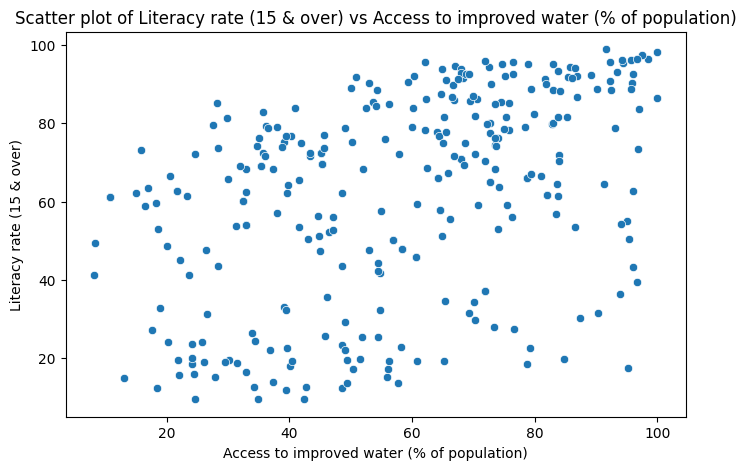

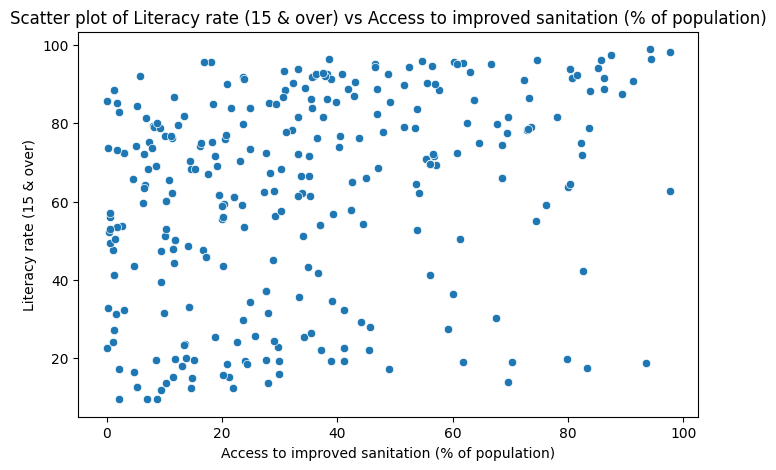

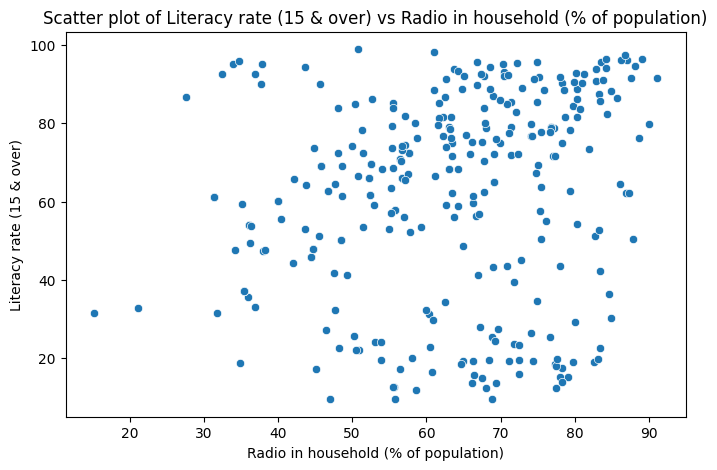

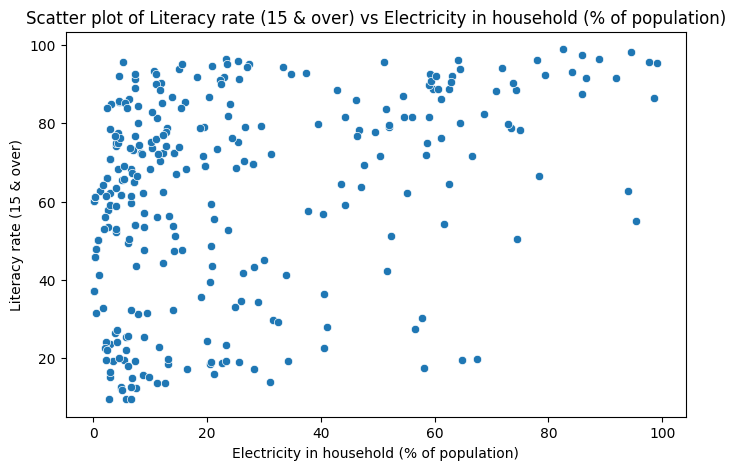

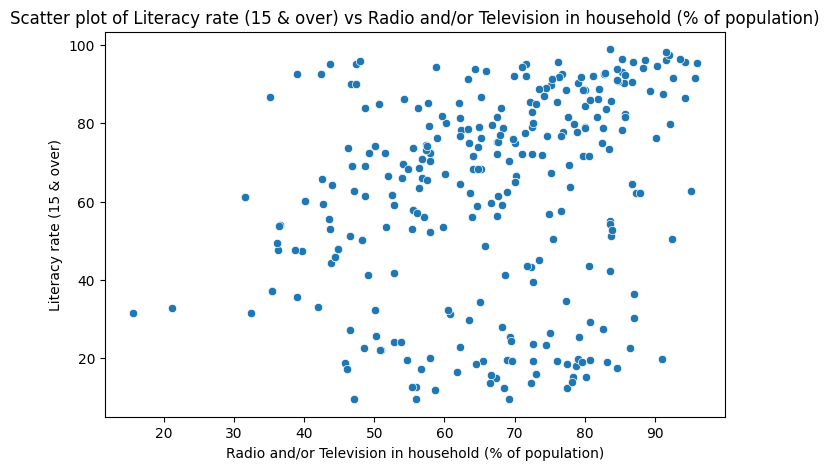

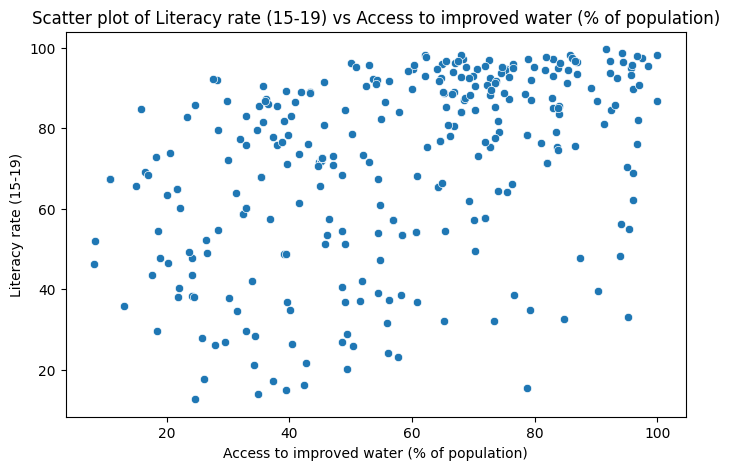

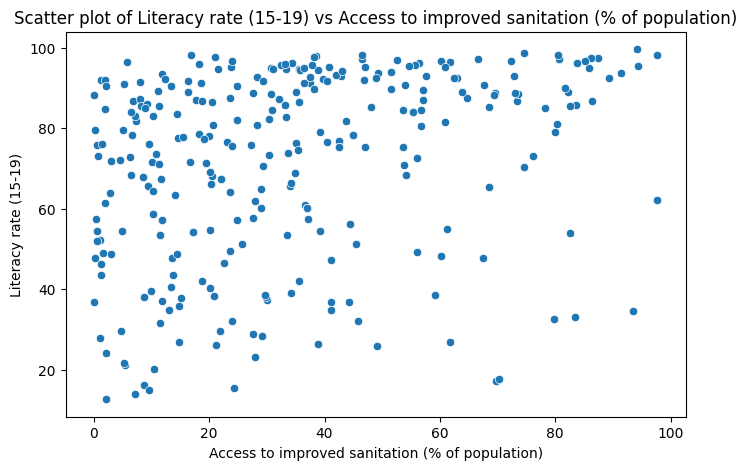

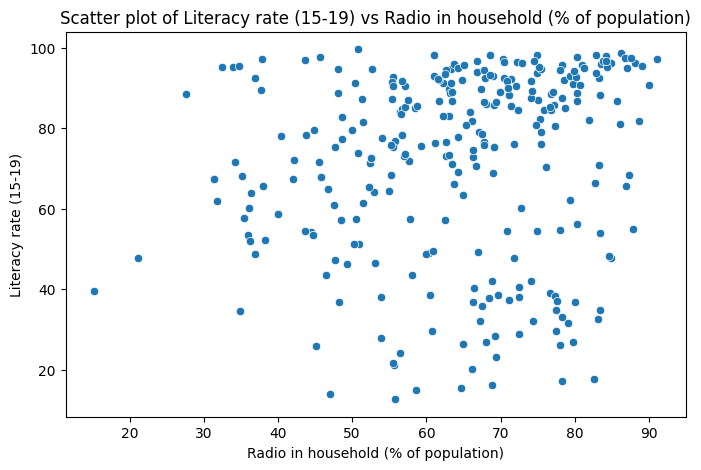

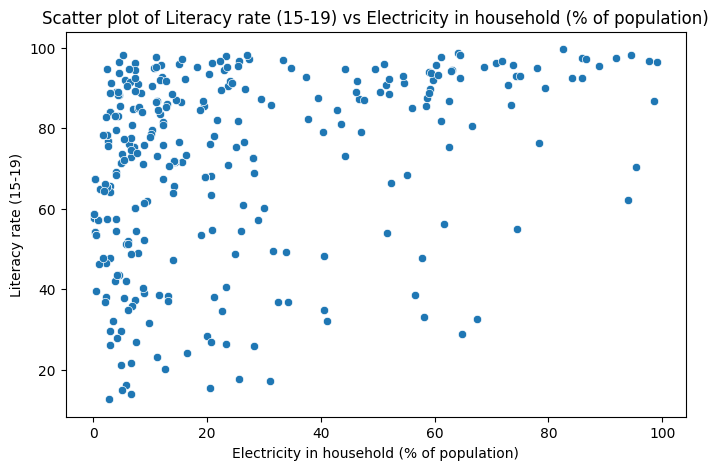

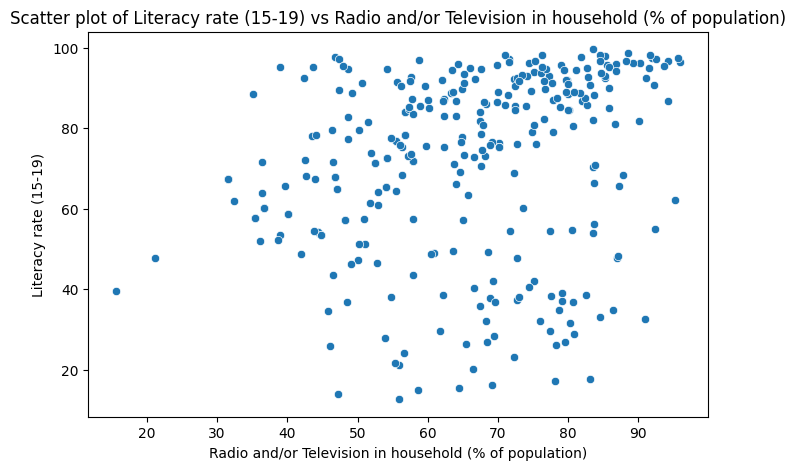

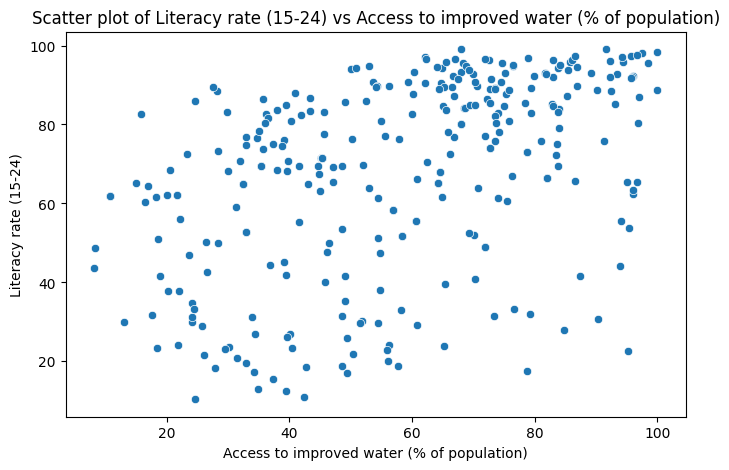

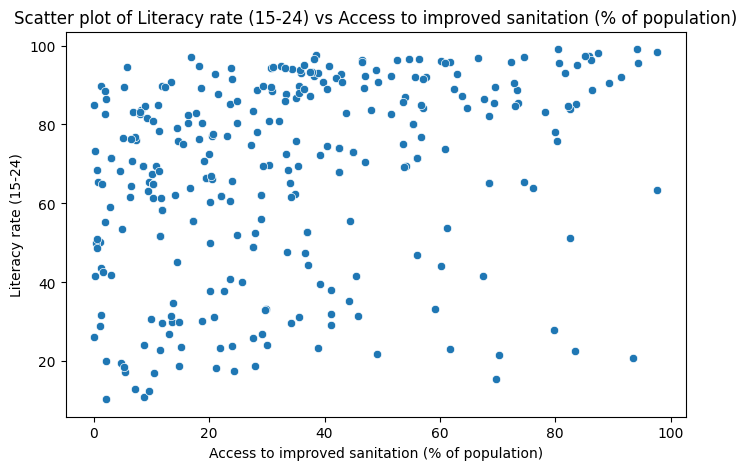

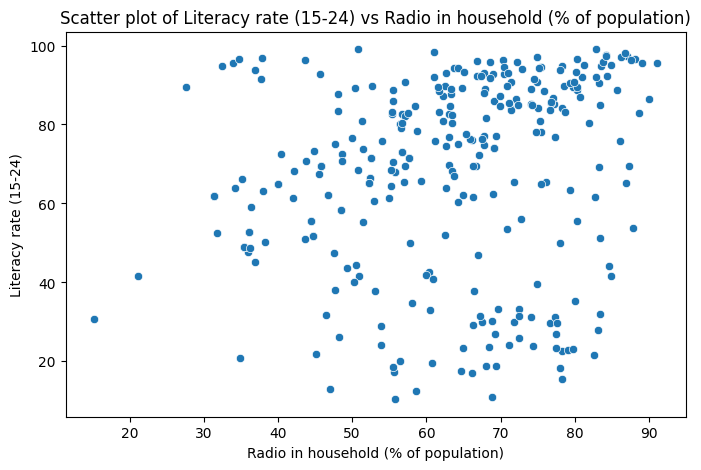

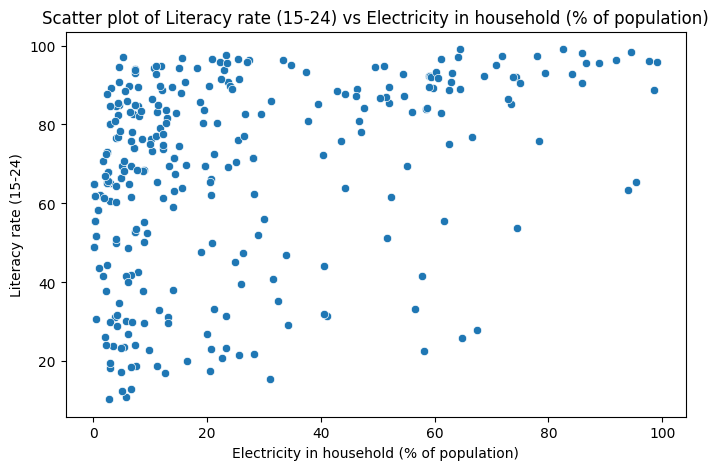

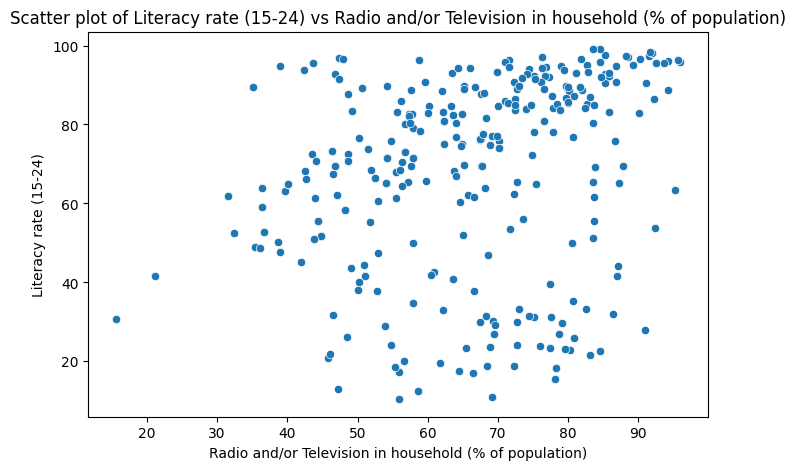

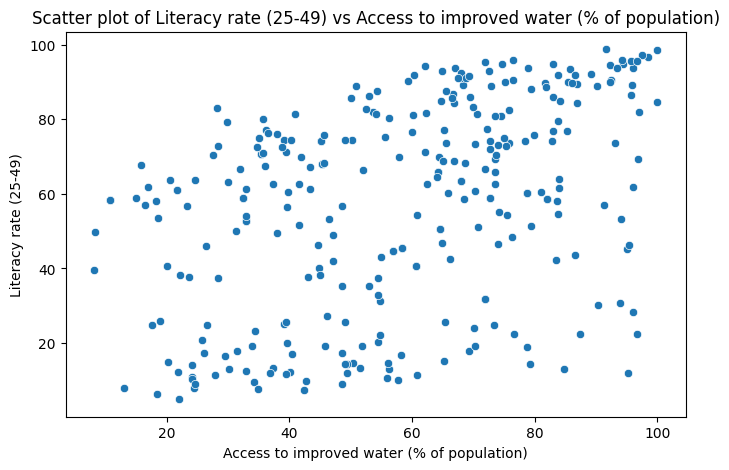

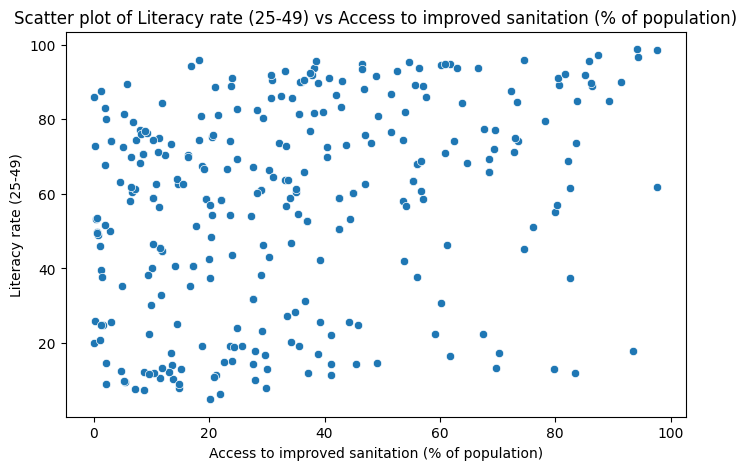

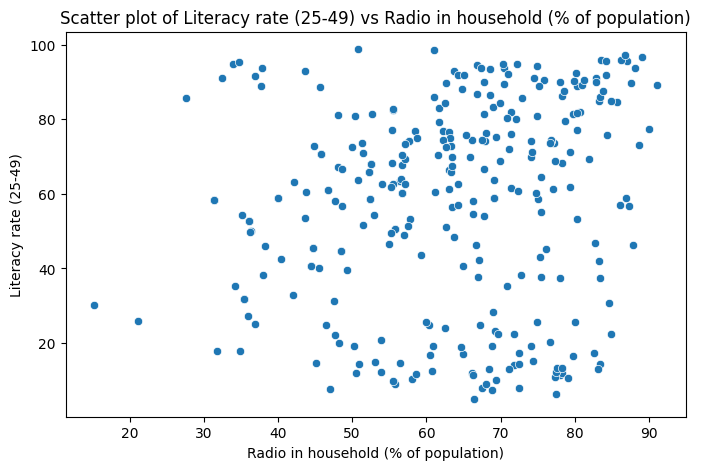

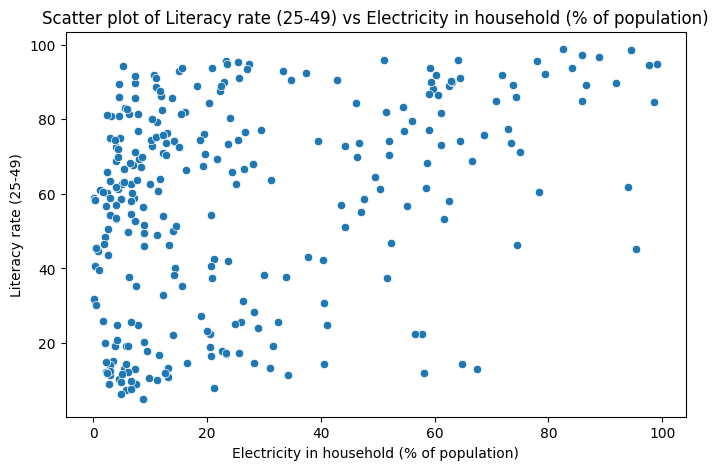

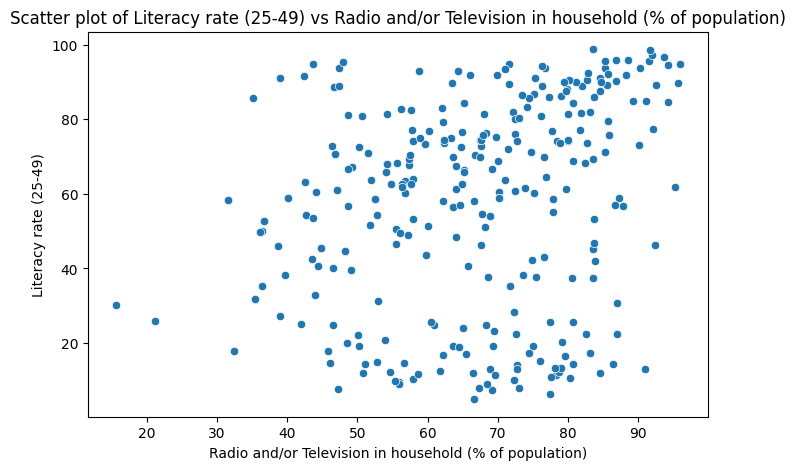

In [ ]:
# specify the literacy and infrastructure (% of population) columns you want to visualize
literacy_columns = ['Literacy rate (15 & over)', 'Literacy rate (15-19)', 'Literacy rate (15-24)', 'Literacy rate (25-49)']
infrastructure_columns = ['Access to improved water (% of population)', 'Access to improved sanitation (% of population)',
                          'Radio in household (% of population)', 'Electricity in household (% of population)',
                          'Radio and/or Television in household (% of population)']

# Call the function to create scatter plots
plot_relationships(clean_data, literacy_columns, infrastructure_columns)


**Insights:**
    
 - A. **For literacy rates (15 and over):**
    - There is no relatinship with Access to improved water (% of populaton)
    - There is no relationship with Improved Santation (% of population)
    - There is a weak positive relationship with Radio in household (% of population)
    - There is a weak positive relationship with Electricity in household (% of population)
    - There is a moderate positive relationship with Rado and/or Television in household (% of population)
    
  
  - B. **For literacy rates (15 - 19):**
    - There is no relatinship with Access to improved water (% of populaton)
    - There is no relationship with Improved Santation (% of population)
    - There is a weak positive relationship with Radio in household (% of population)
    - There is no relationship with Electricity in household (% of population)
    - There is a weak positive relationship with Rado and/or Television in household (% of population)
    
 - C. **For literacy rates (15 - 24):**
    - There is no relatinship with Access to improved water (% of populaton)
    - There is no relationship with Improved Santation (% of population)
    - There is a weak positive relationship with Radio in household (% of population)
    - There is no relationship with Electricity in household (% of population)
    - There is a weak positive relationship with Rado and/or Television in household (% of population)
    
    
 - D. **For literacy rates (25 - 49):**
    - There is no relatinship with Access to improved water (% of populaton)
    - There is no relationship with Improved Santation (% of population)
    - There is no positive relationship with Radio in household (% of population)
    - There is no relationship with Electricity in household (% of population)
    - There is a weak positive relationship with Rado and/or Television in household (% of population)
    
    
    

**2. Is there any relationship between literacy rates and social infrastructures (% of households) ?**

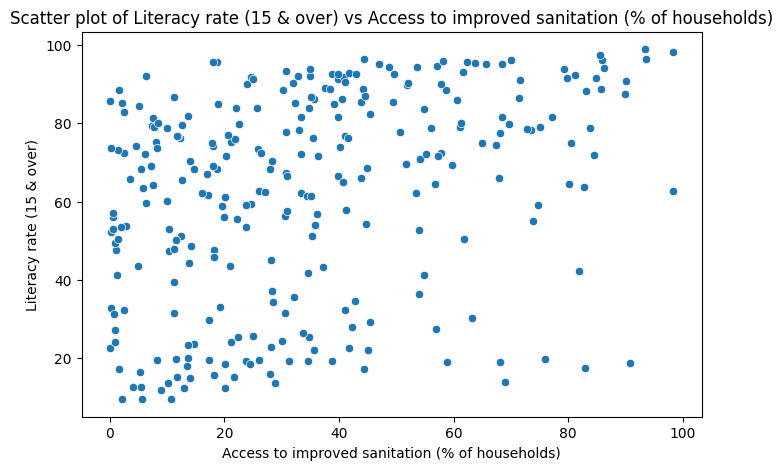

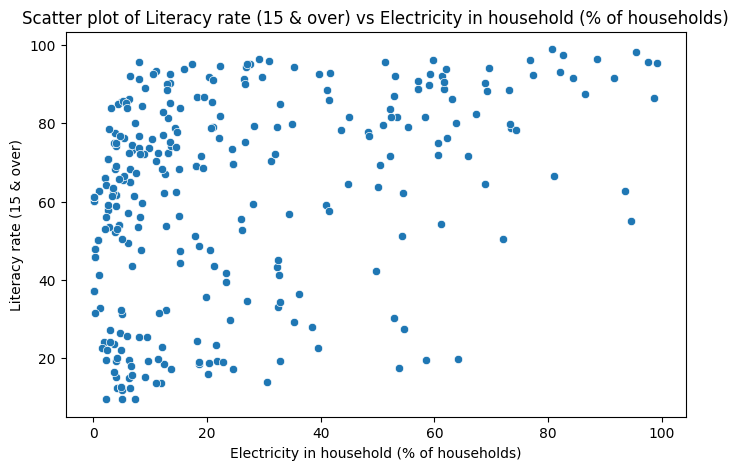

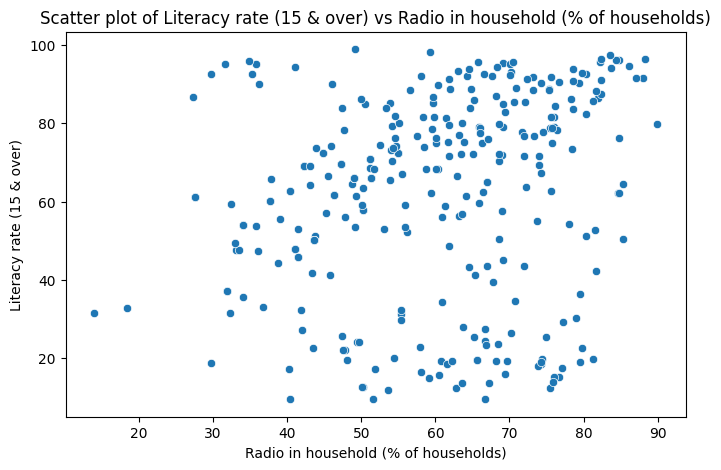

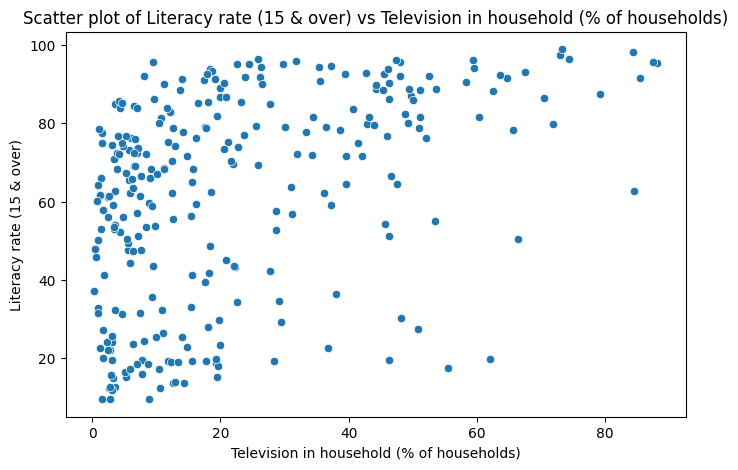

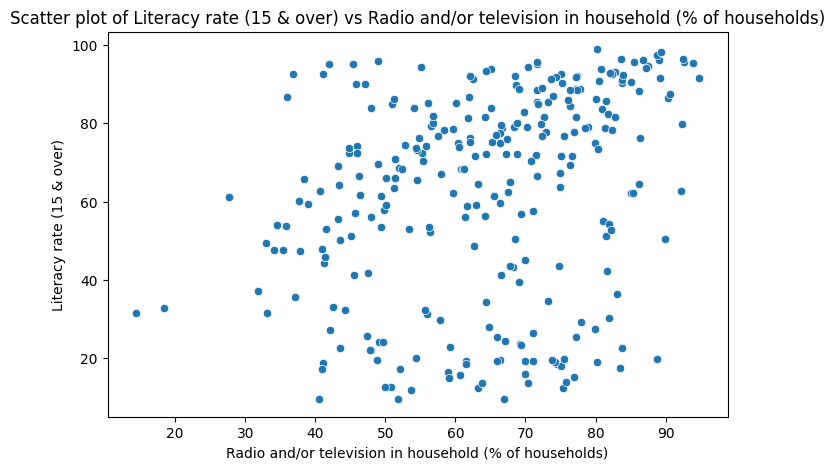

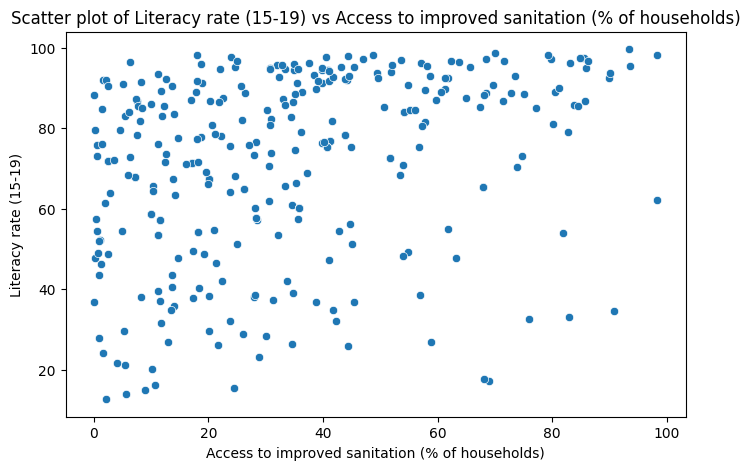

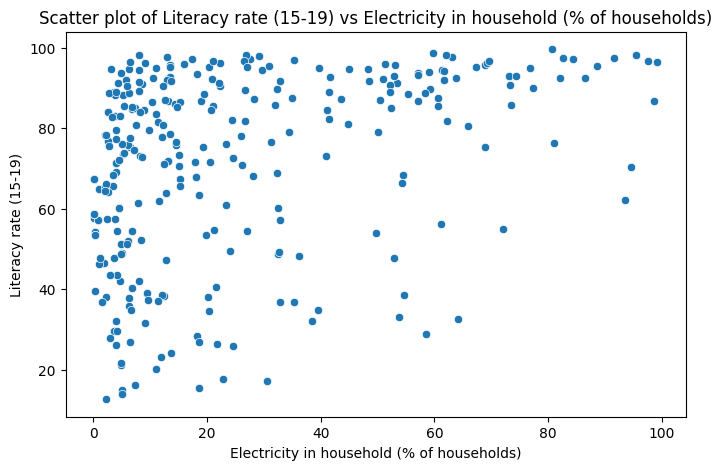

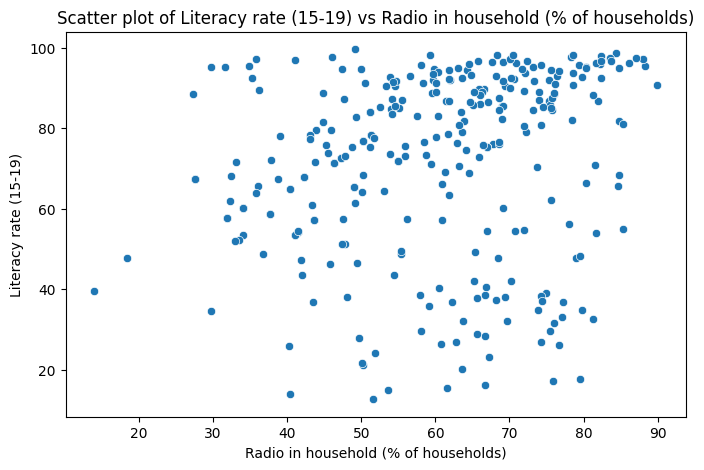

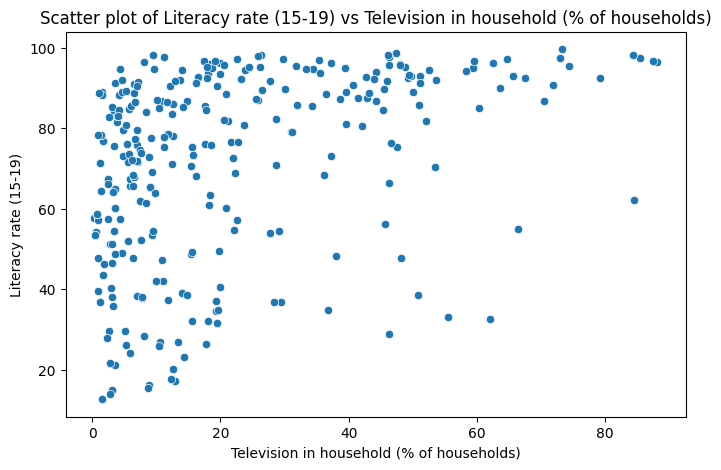

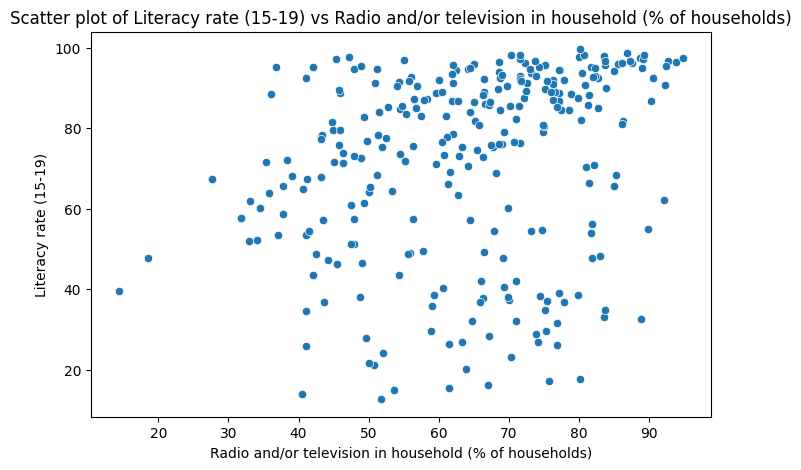

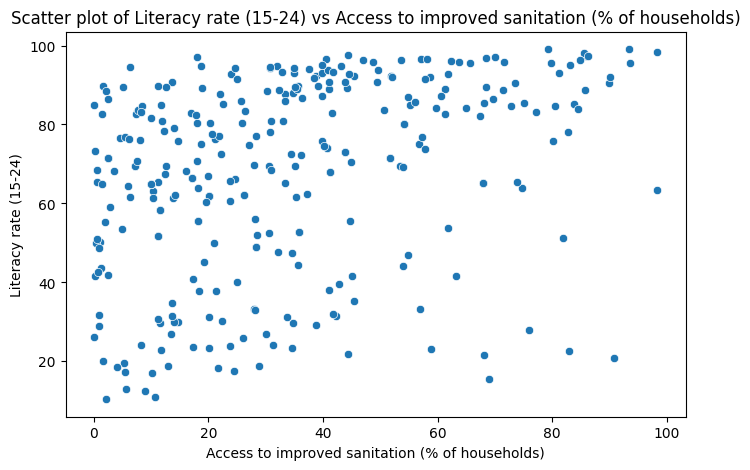

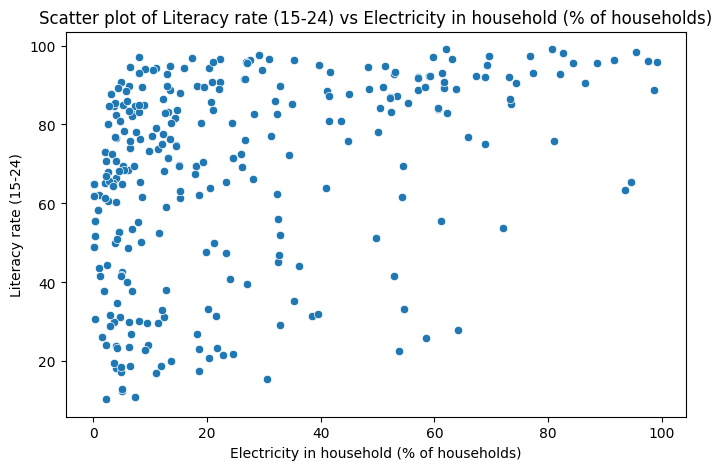

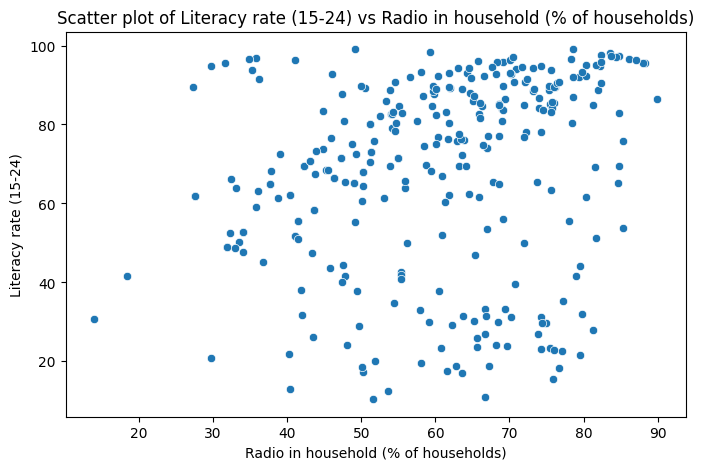

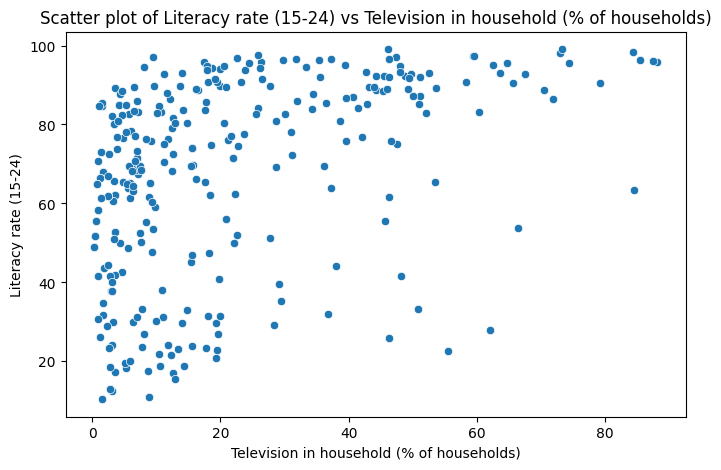

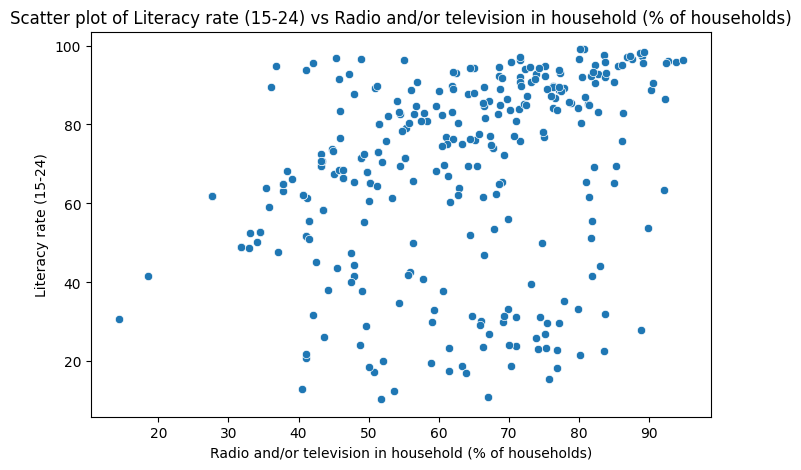

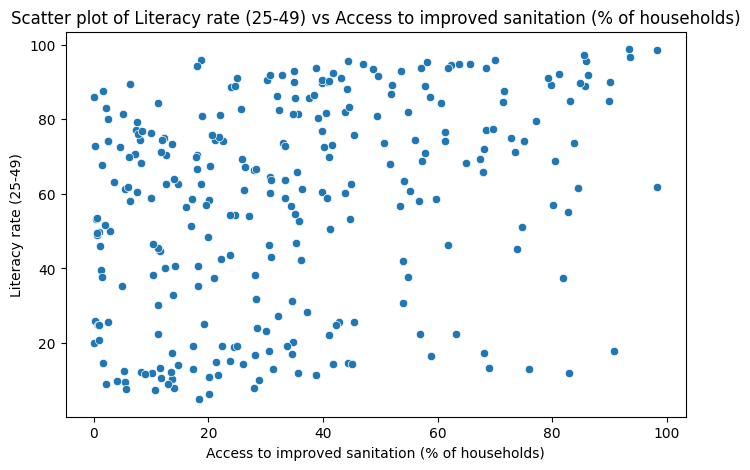

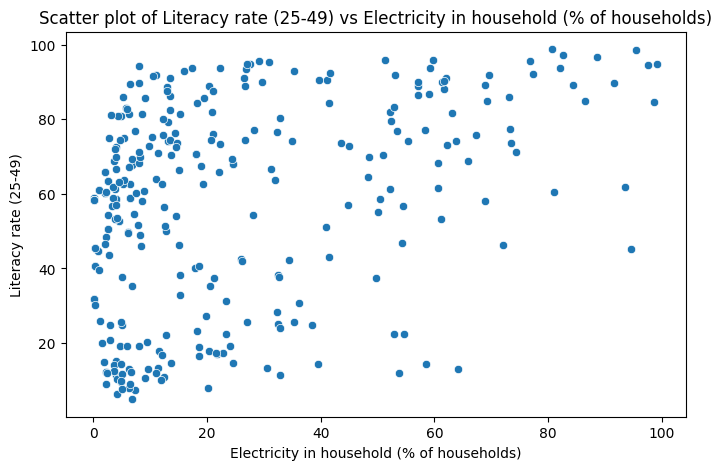

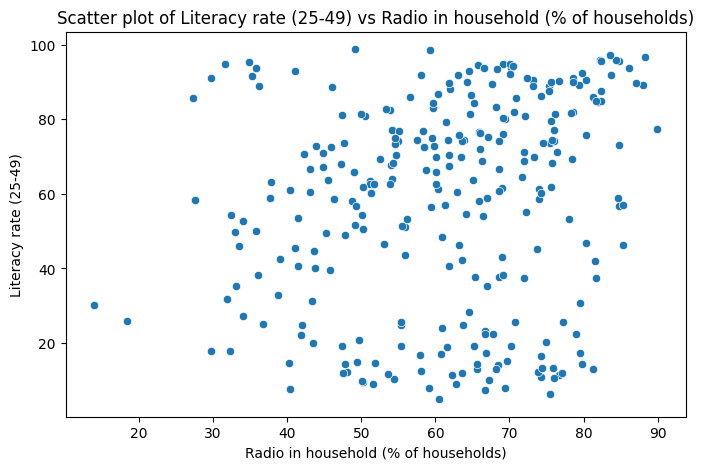

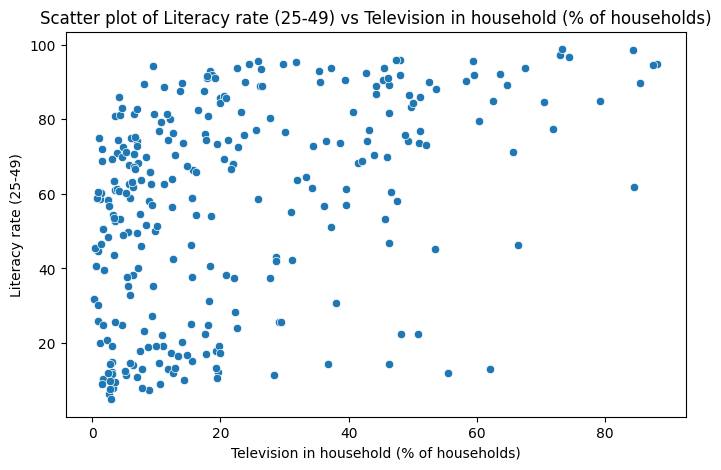

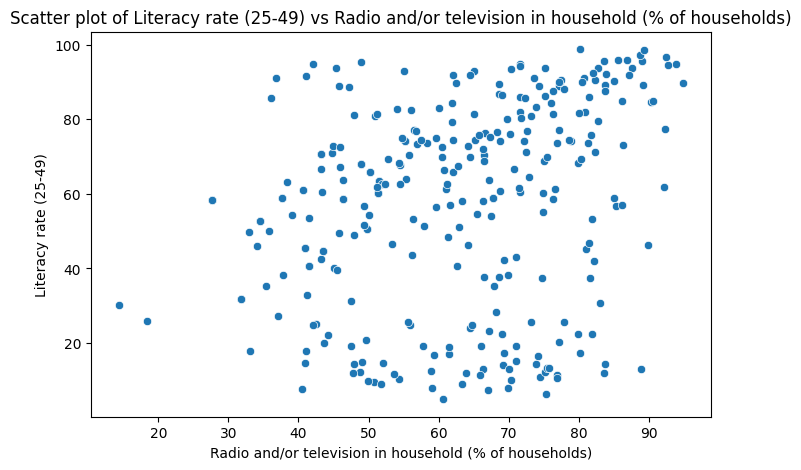

In [ ]:
# specify the literacy and infrastructure (% of households) columns you want to visualize
literacy_columns2 = ['Literacy rate (15 & over)', 'Literacy rate (15-19)', 'Literacy rate (15-24)', 'Literacy rate (25-49)']
infrastructure_columns2 = ['Access to improved sanitation (% of households)', 'Electricity in household (% of households)',
                           'Radio in household (% of households)', 'Television in household (% of households)',
                           'Radio and/or television in household (% of households)']

# call the function to create scatter plots
plot_relationships(clean_data, literacy_columns2, infrastructure_columns2)


**Insights:**
    
 - A. **For literacy rates (15 and over):**
    - There is no relatinship with Access to improved water (% of households)
    - There is no relationship with Improved Santation (% of households)
    - There is a weak positive relationship with Radio in household (% of households)
    - There is no positive relationship with Electricity in household (% of households)
    - There is a weak positive relationship with Rado and/or Television in household (% of households)
    
  
  - B. **For literacy rates (15 - 19):**
    - There is no relatinship with Access to improved water (% of households)
    - There is no relationship with Improved Santation (% of households)
    - There is a weak positive relationship with Radio in household (% of households)
    - There is no relationship with Electricity in household (% of households)
    - There is a weak positive relationship with Rado and/or Television in household (% of households)
    
 - C. **For literacy rates (15 - 24):**
    - There is no relatinship with Access to improved water (% of households)
    - There is no relationship with Improved Santation (% of households)
    - There is a weak positive relationship with Radio in household (% of households)
    - There is no relationship with Electricity in household (% of households)
    - There is a weak positive relationship with Rado and/or Television in household (% of households)
    
    
 - D. **For literacy rates (25 - 49):**
    - There is no relatinship with Access to improved water (% of households)
    - There is no relationship with Improved Santation (% of households)
    - There is a weak positive relationship with Radio in household (% of households)
    - There is no relationship with Electricity in household (% of households)
    - There is a weak positive relationship with Rado and/or Television in household (% of households)

**3. Is there any relationship between literacy rates and access to education (attendance rate (%)) ?**

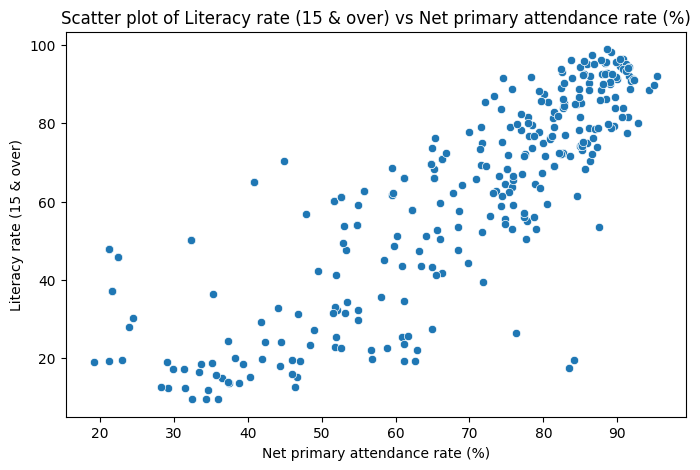

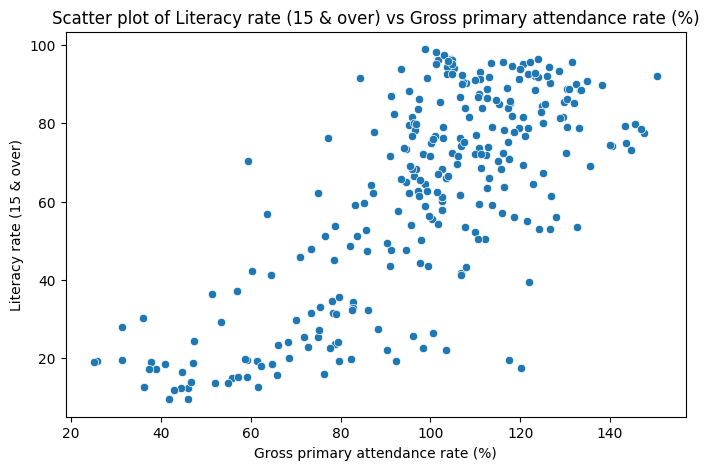

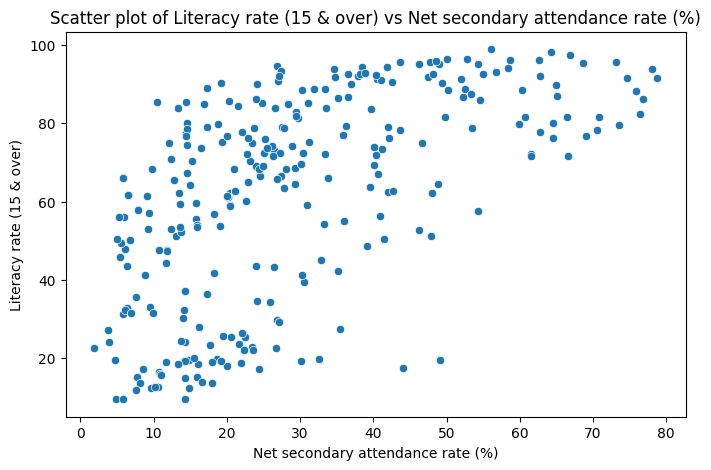

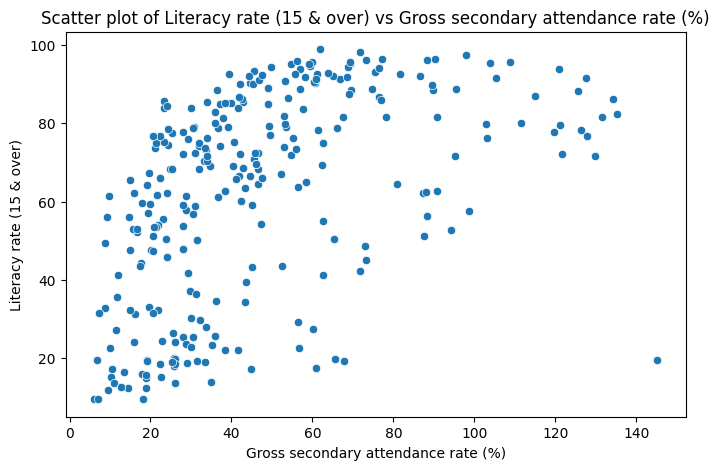

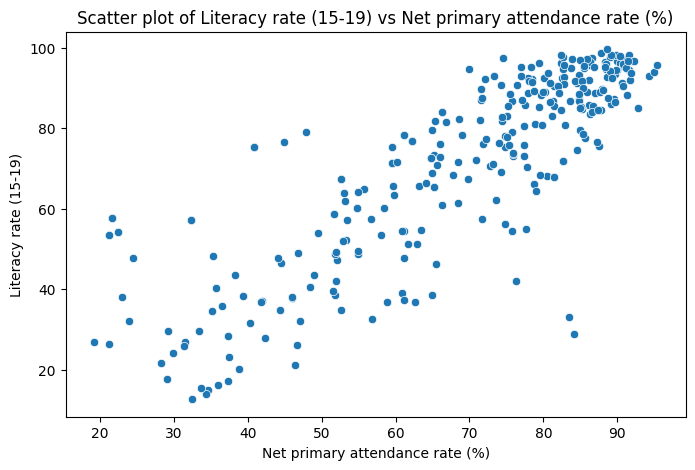

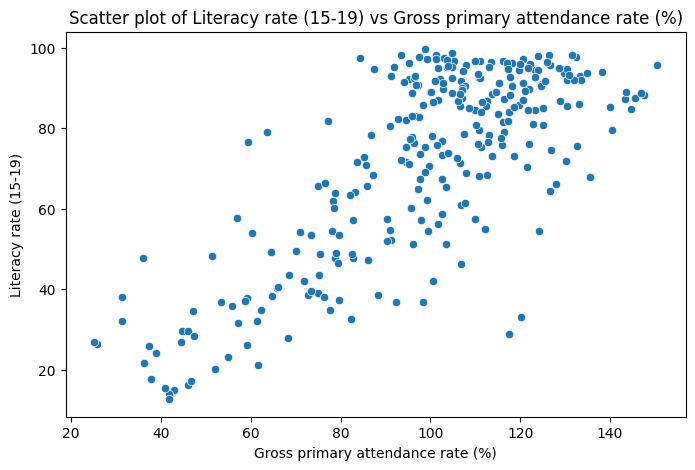

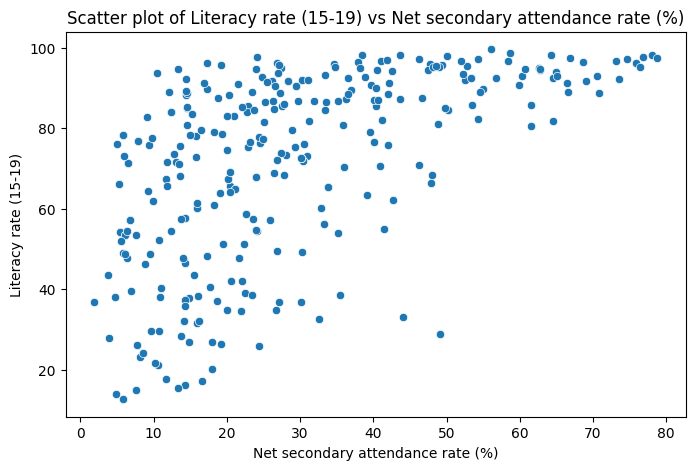

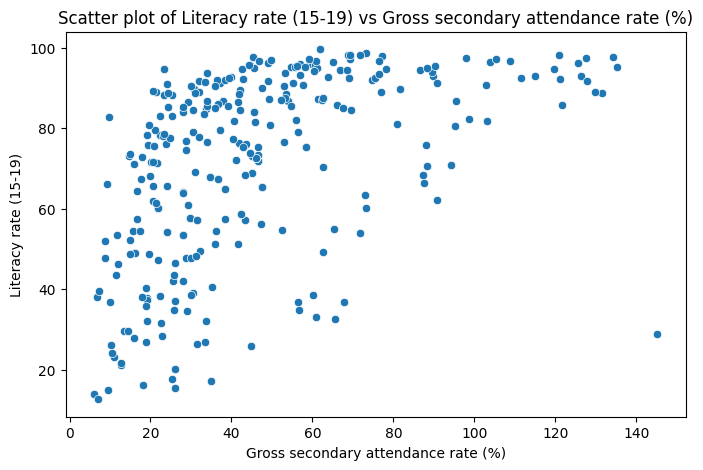

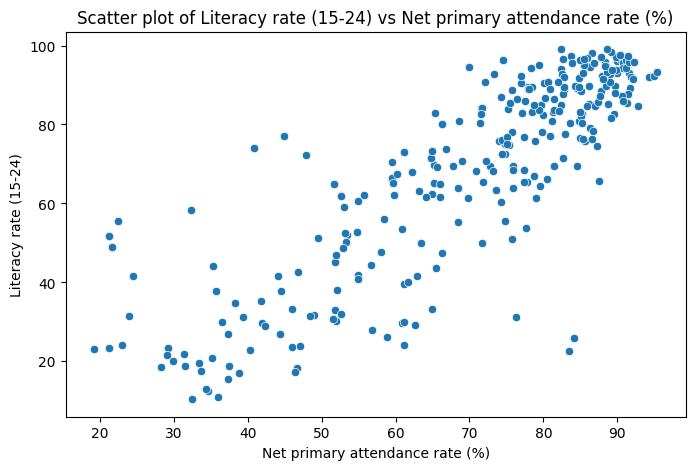

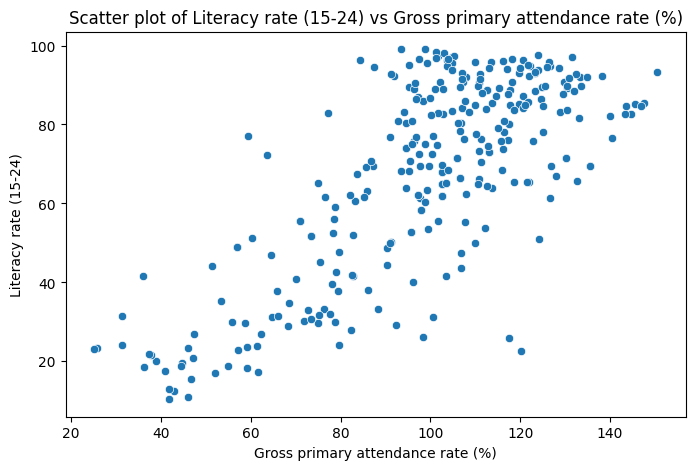

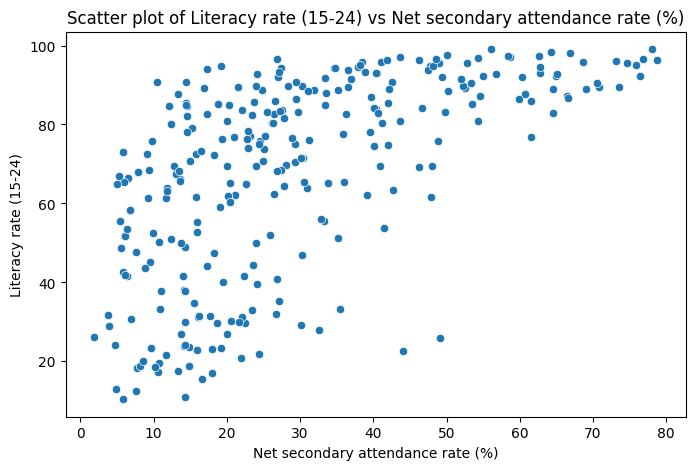

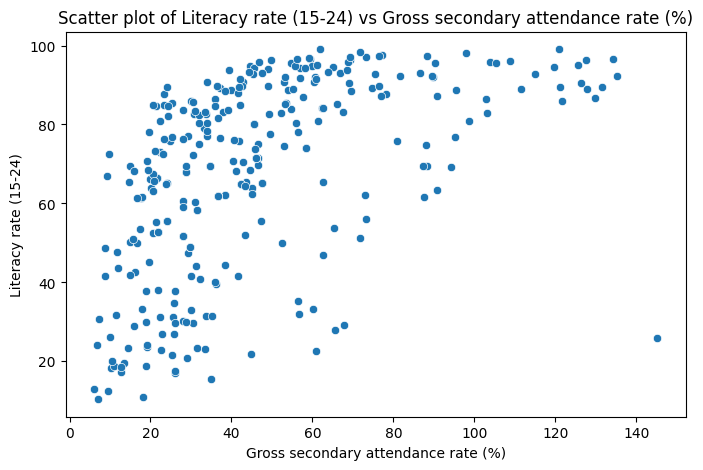

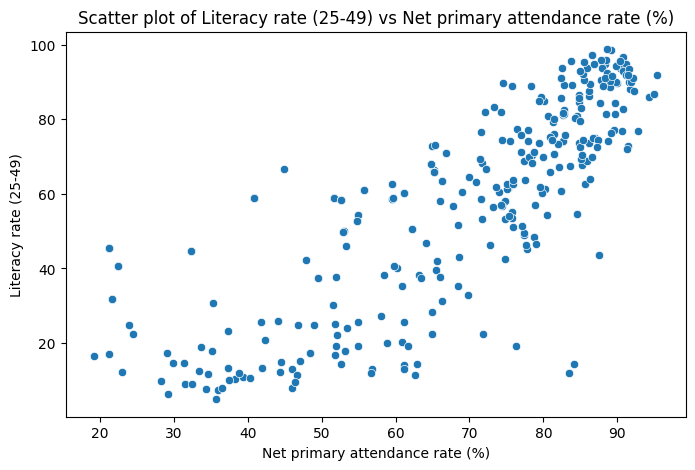

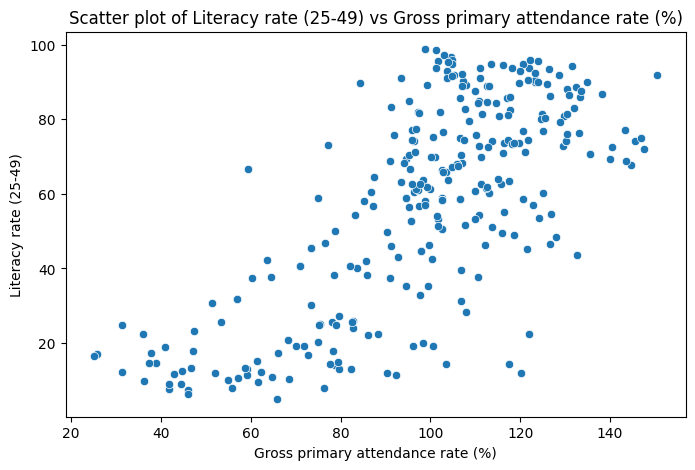

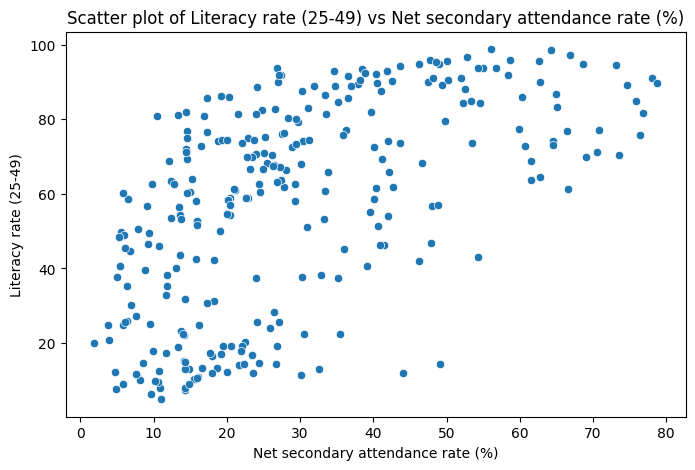

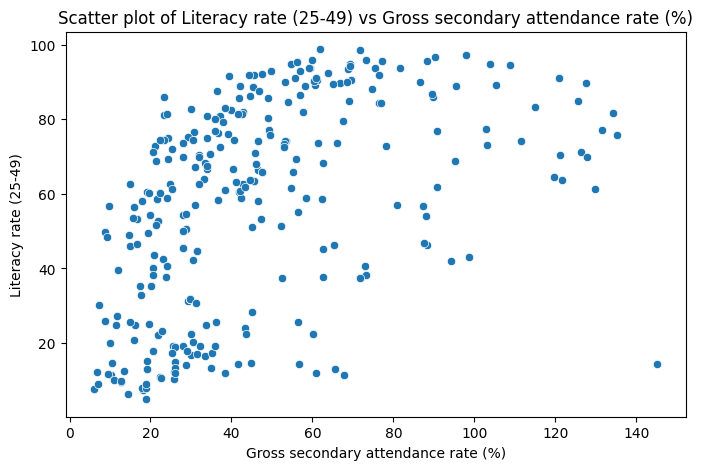

In [ ]:
# specify the literacy and infrastructure columns you want to visualize
literacy_columns3 = ['Literacy rate (15 & over)', 'Literacy rate (15-19)', 'Literacy rate (15-24)', 'Literacy rate (25-49)']
access_to_education_columns = ['Net primary attendance rate (%)', 'Gross primary attendance rate (%)',
                           'Net secondary attendance rate (%)', 'Gross secondary attendance rate (%)']

# Call the function to create scatter plots
plot_relationships(clean_data, literacy_columns3, access_to_education_columns)

**Insights:**
    
 - A. **For literacy rates (15 and over):**
    - There is a strong positive relationship with Net primary attendance rate (%)
    - There is a strong positive relationship with Gross primary attendance rate (%)
    - There is a moderate positive relationship with Net secondary attendance rate (%)
    - There is a weak positive relationship with Gross secondary attendance rate (%)
    
  - B. **For literacy rates (15 - 19):**
    - There is a strong positive relationship with Net primary attendance rate (%)
    - There is a strong positive relationship with Gross primary attendance rate (%)
    - There is a weak positive relationship with Net secondary attendance rate (%)
    - There is a weak positive relationship with Gross secondary attendance rate (%)
    
 - C. **For literacy rates (15 - 24):**
    -- There is a strong positive relationship with Net primary attendance rate (%)
    - There is a strong positive relationship with Gross primary attendance rate (%)
    - There is a weak positive relationship with Net secondary attendance rate (%)
    - There is a weak positive relationship with Gross secondary attendance rate (%)
    
 - D. **For literacy rates (25 - 49):**
   - There is a strong positive relationship with Net primary attendance rate (%)
    - There is a moderate positive relationship with Gross primary attendance rate (%)
    - There is a weak positive relationship with Net secondary attendance rate (%)
    - There is a weak positive relationship with Gross secondary attendance rate (%)

**4. Which countries have high literacy rate?**

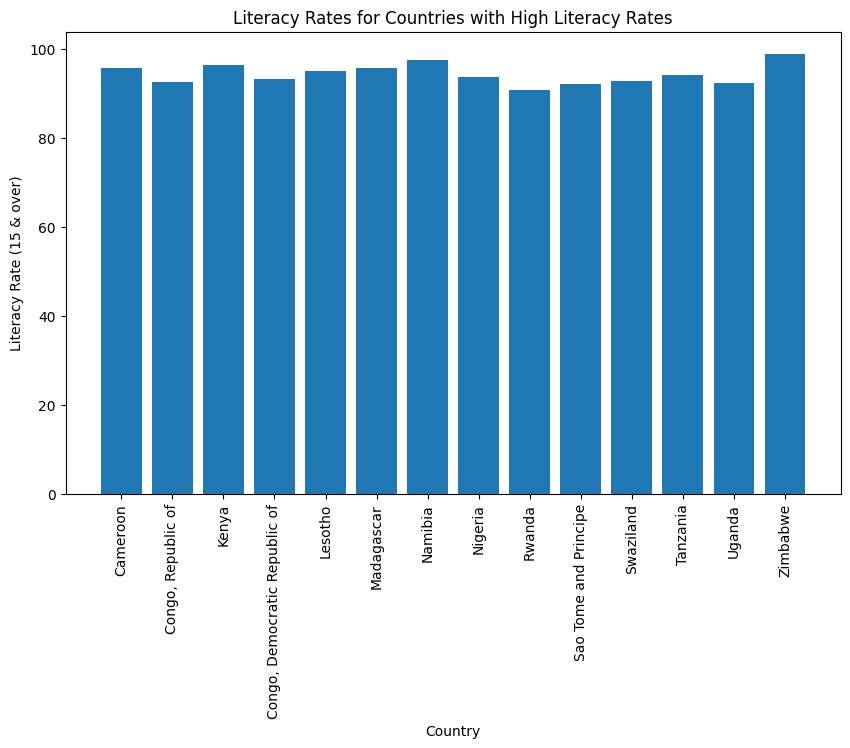

In [ ]:
# Filter for countries with high literacy rates (e.g., literacy rate > 90)
high_literacy_df = clean_data[clean_data['Literacy rate (15 & over)'] > 90]

# Create a bar chart to display literacy rates for different countries
plt.figure(figsize=(10, 6))
plt.bar(high_literacy_df['Country name'], high_literacy_df['Literacy rate (15 & over)'])
plt.title('Literacy Rates for Countries with High Literacy Rates')
plt.xlabel('Country')
plt.ylabel('Literacy Rate (15 & over)')

# Show the bar chart
plt.xticks(rotation=90)
plt.show()

**Insights:**
    
The countries with high high literacy rate as regard the Literacy rate (15 & over) literacy age group are Zimbabwe, Namibia, and Kenya.

**5. Can you compare the school attendance rates for high literacy Subnational regions?**

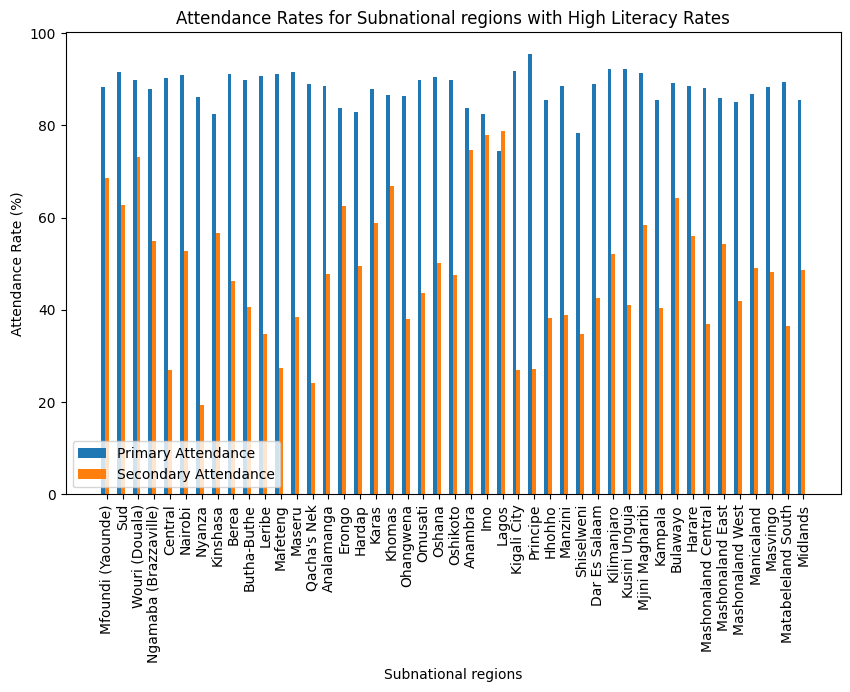

In [ ]:
# create a grouped bar chart to compare school attendance rates for high literacy subnational regions
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Position of bars on X-axis
bar1 = range(len(high_literacy_df))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]

plt.bar(bar1, high_literacy_df['Net primary attendance rate (%)'], width=bar_width, label='Primary Attendance')
plt.bar(bar2, high_literacy_df['Net secondary attendance rate (%)'], width=bar_width, label='Secondary Attendance')

plt.title('Attendance Rates for Subnational regions with High Literacy Rates')
plt.xlabel('Subnational regions')
plt.ylabel('Attendance Rate (%)')
plt.xticks([x + bar_width for x in bar1], high_literacy_df['Subnational region name'])
plt.legend(loc = 'lower left')

# Show the grouped bar chart
plt.xticks(rotation=90)
plt.show()

**6. What are the trends in over time?**

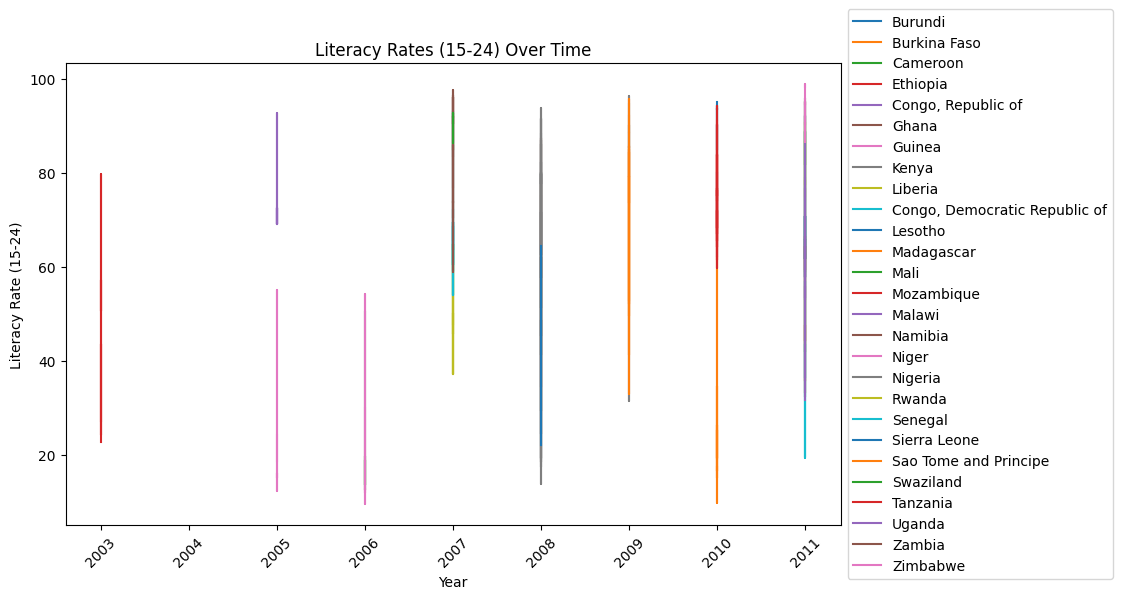

In [ ]:
# checking the trends in literacy rate for the literacy rates (15-24) age group

# create a line plot to show trends in literacy rates (15-24) over time
plt.figure(figsize=(10, 6))
for country in clean_data['Country name'].unique():
    country_data = clean_data[clean_data['Country name'] == country]
    plt.plot(country_data['Year'], country_data['Literacy rate (15 & over)'], label=country)

plt.title('Literacy Rates (15-24) Over Time')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (15-24)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the line plot
plt.xticks(rotation=45)
plt.show()

**Insights:**
    
We observe that for the countries with high literacy rates, the literacy rates increase was highest in 2007, followed by 2011.

**7. Can you compare the literacy rates by Country? What did you find out?**

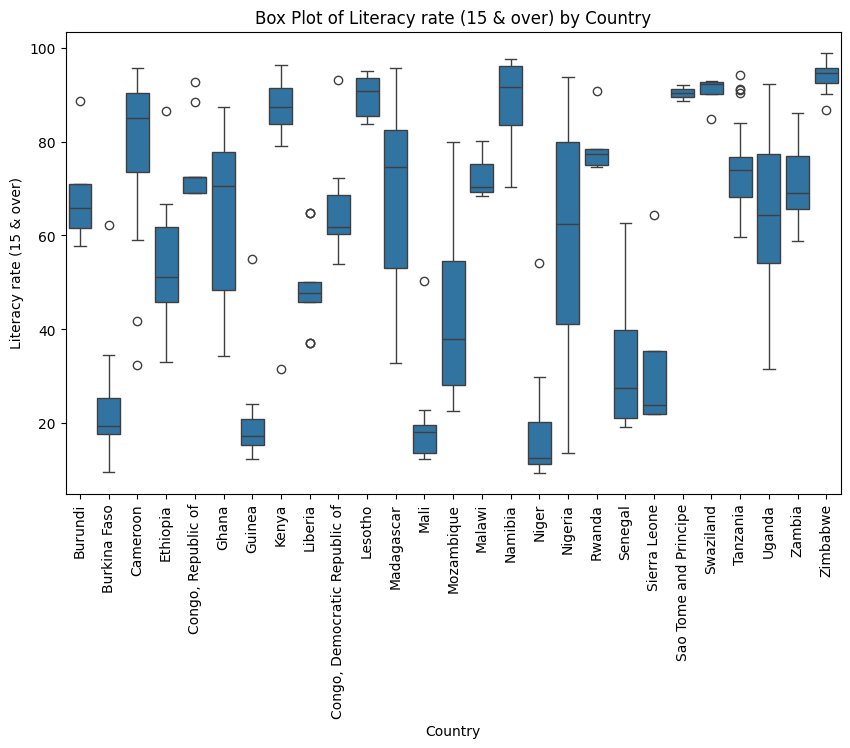

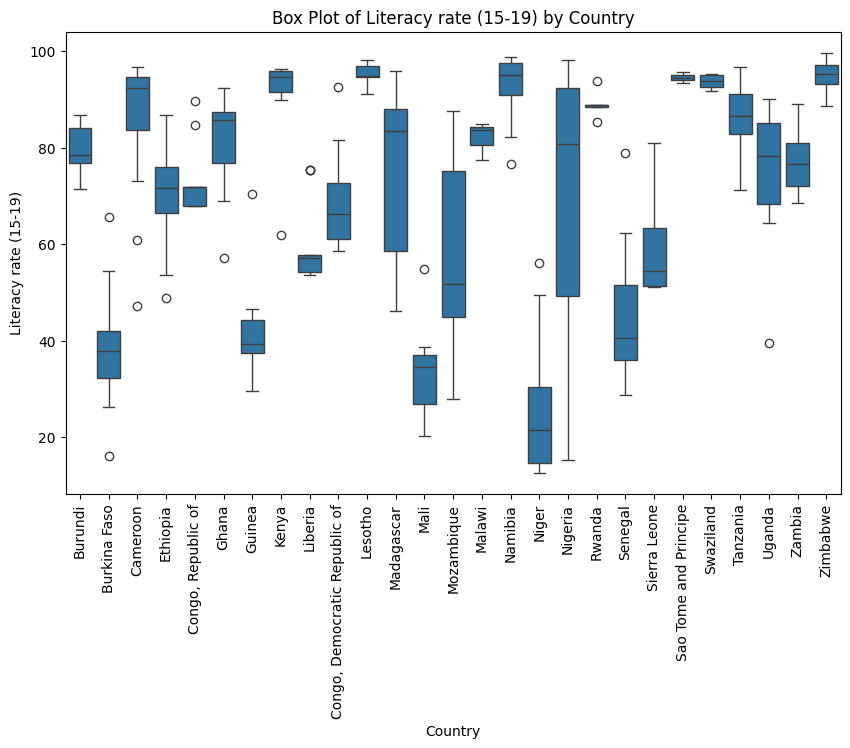

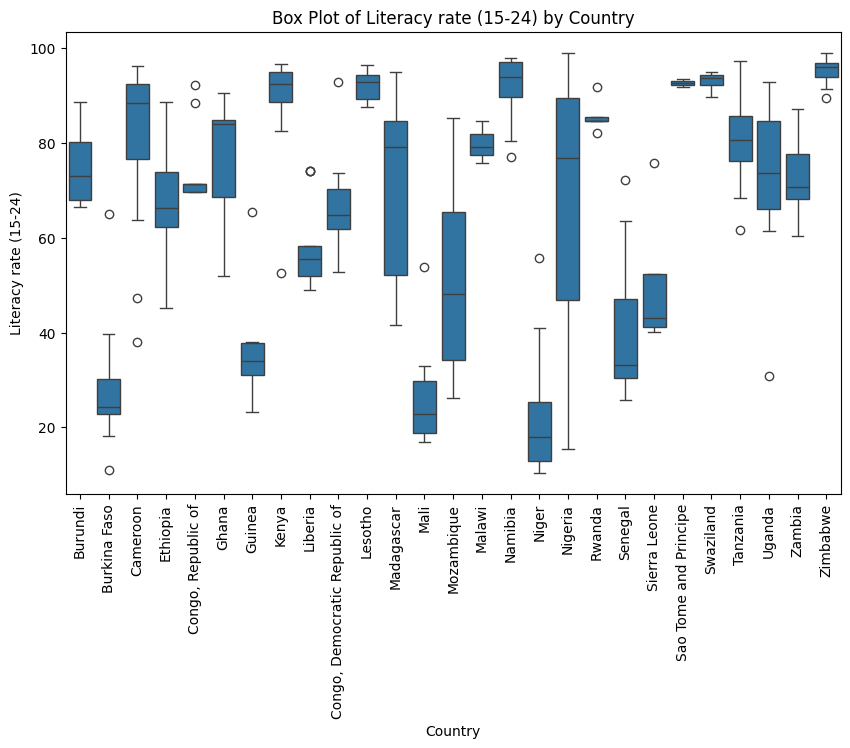

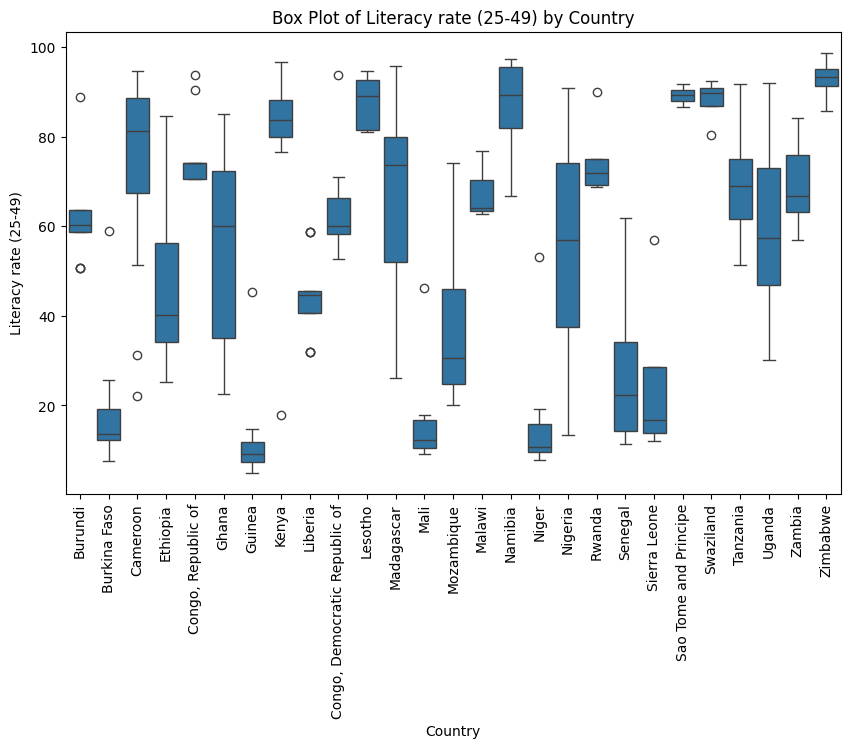

In [ ]:
literacy_columns = ['Literacy rate (15 & over)', 'Literacy rate (15-19)', 'Literacy rate (15-24)', 'Literacy rate (25-49)']
attendance_rate_columns = ['Net primary attendance rate (%)', 'Gross primary attendance rate (%)',
                           'Net secondary attendance rate (%)', 'Gross secondary attendance rate (%)']

# Create box plots for literacy columns by region
for literacy_column in literacy_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country name', y=literacy_column, data=clean_data)
    plt.title(f'Box Plot of {literacy_column} by Country')
    plt.xlabel('Country')
    plt.ylabel(literacy_column)
    plt.xticks(rotation=90)
    plt.show()

**Insights:**
    
  - A. **For literacy rates (15 and over):** Zimbabwe, Namibia, Madagascar and Cameroon are countries with the highest    literacy rates.
    
  - B. **For literacy rates (15 - 19):** Zimbabwe, Namibia, and Lesotho are countries with the highest literacy rates.
    
  - C. **For literacy rates (15 - 24):** Zimbabwe, Nigeria, Namibia, and Tanzania are countries with the highest literacy rates.
    
 - D. **For literacy rates (25 - 49):** Zimbabwe, Namibia and Kenya are countries with the highest literacy rates.

**8. Can you compare the school attendance rates by Country? What did you find out?**

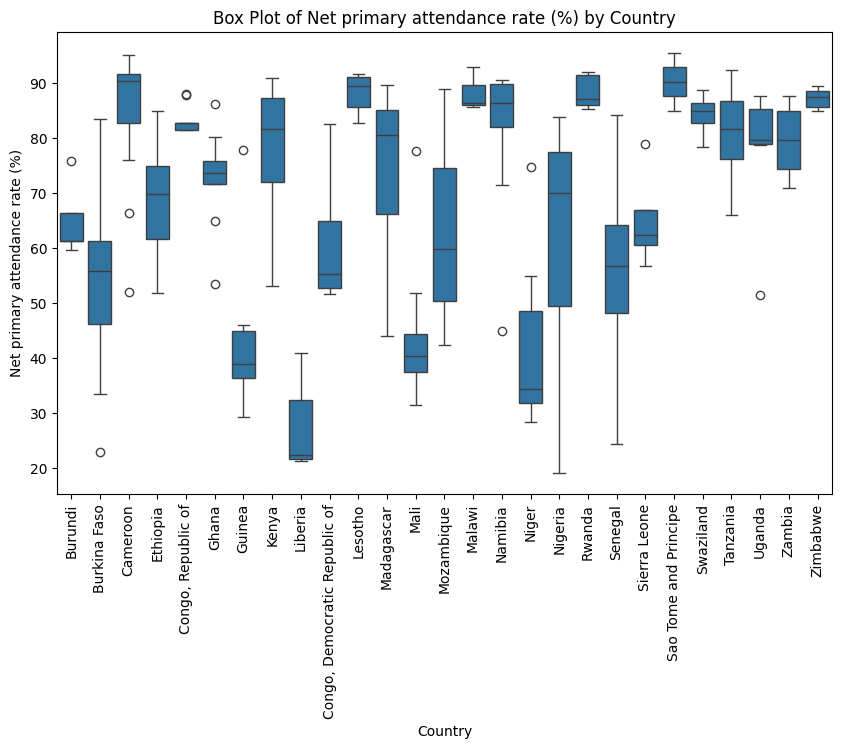

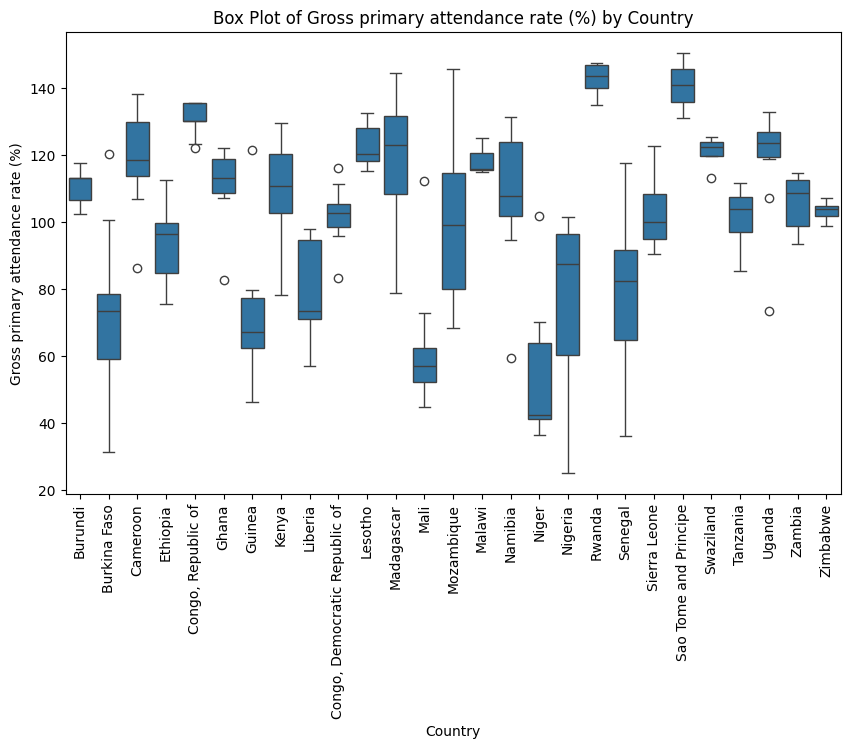

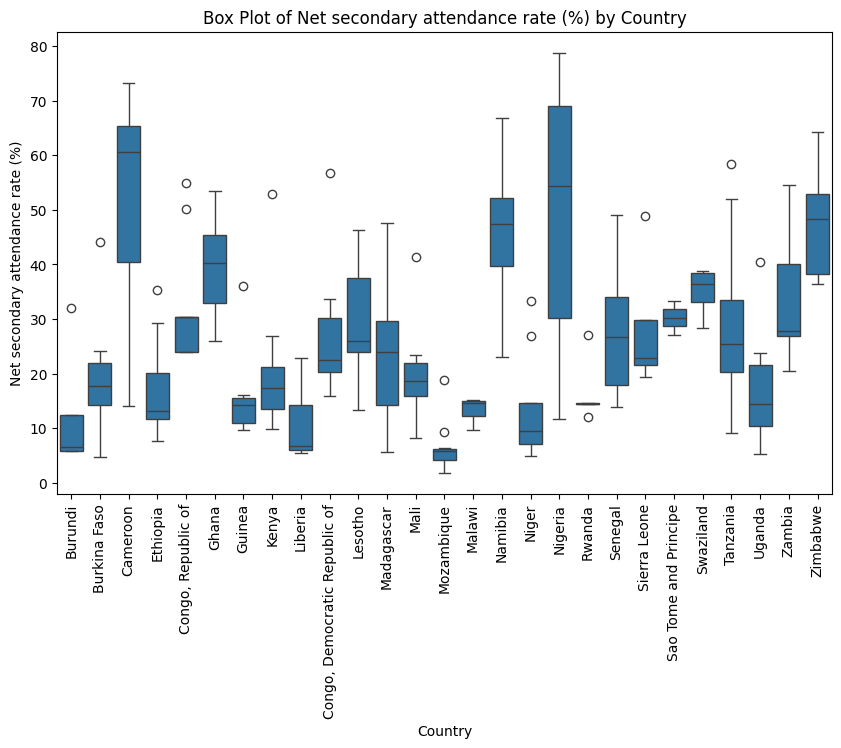

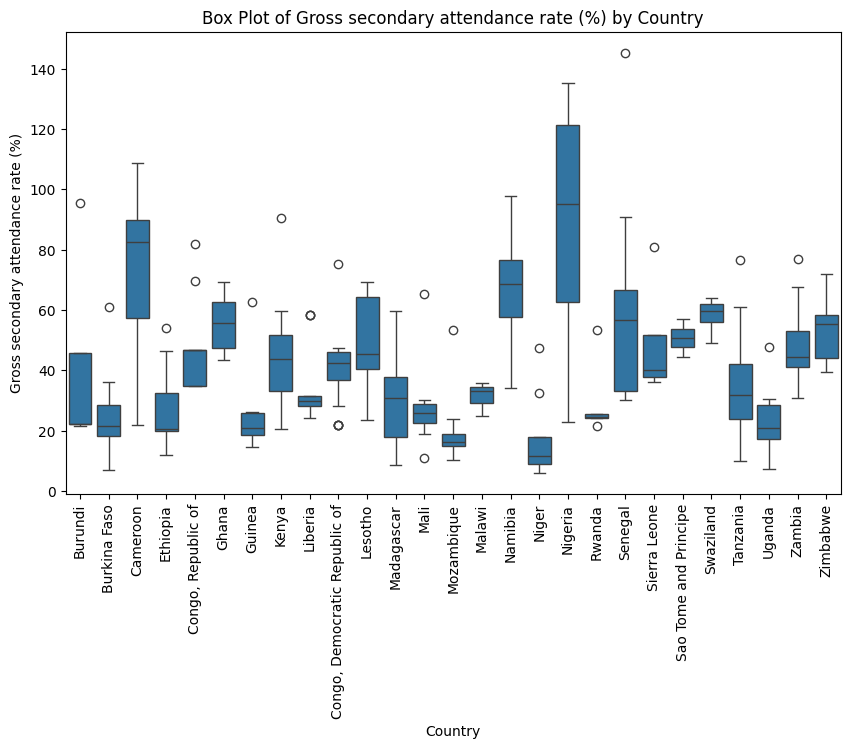

In [ ]:
# Create box plots for attendance rate columns by region
for attendance_column in attendance_rate_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country name', y=attendance_column, data=clean_data)
    plt.title(f'Box Plot of {attendance_column} by Country')
    plt.xlabel('Country')
    plt.ylabel(attendance_column)
    plt.xticks(rotation=90)
    plt.show()

**Insights:**

`Net primary attendance rate (%)`, `Gross primary attendance rate (%)`,
                           `Net secondary attendance rate (%)`, `Gross secondary attendance rate (%)`
    
  - A. **For Net primary attendance rate (%):** Sao Tome and Principe, Cameroon and Rwanda are countries with the highest Net attendance primary rates.
  
  - B. **For Gross primary attendance rate (%):** Sao Tome and Principe, Rwanda and Mozambique are countries with the highest Gross attendance primary rates.
    
  - C. **For Net secondary attendance rate (%):** Nigeria, Camerron, and Namibia are countries with the highest Net attendance secondary rates.
    
 - D. **For Gross secondary attendance rate (%):** Nigeria, Camerron, and Namibia are countries with the highest Gross attendance secondary rates.

**9. Can you show the correlation matrix between attendance rates in different Countries?**

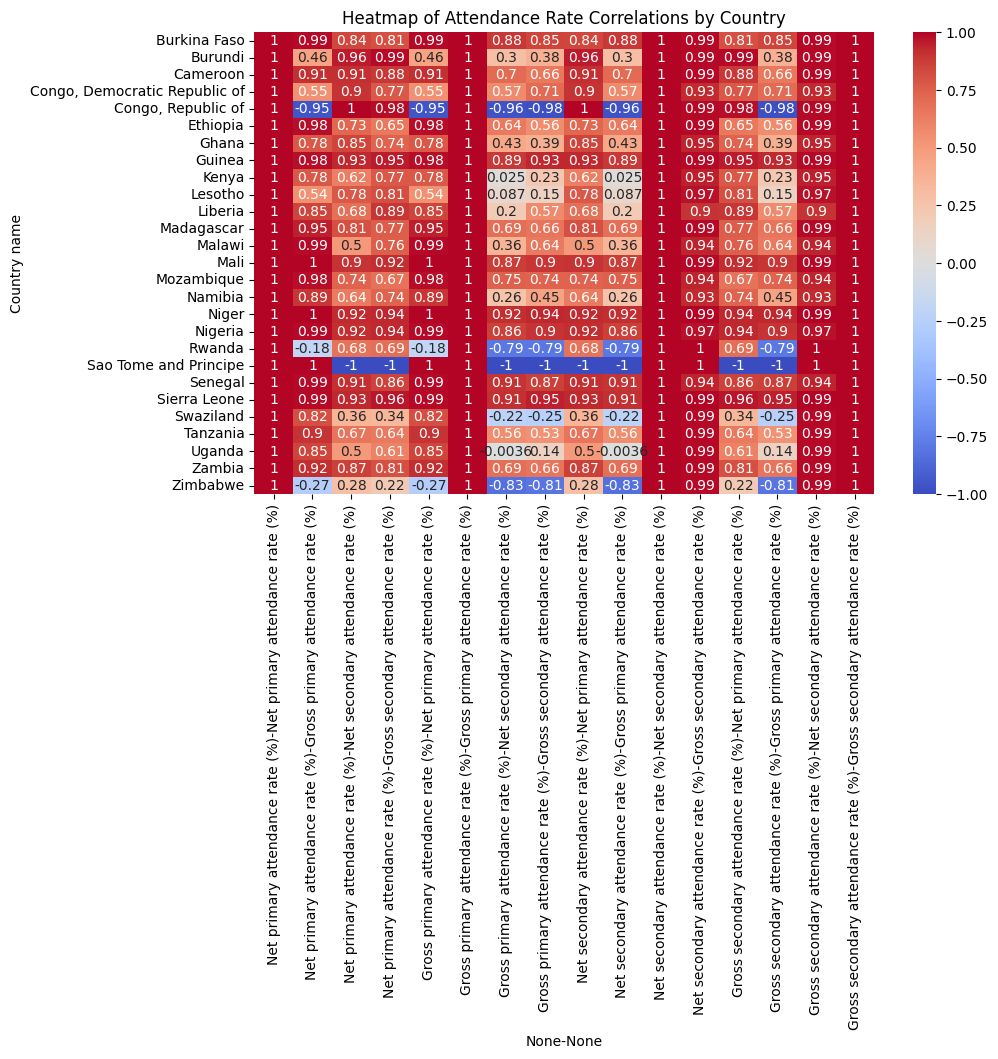

In [ ]:
# create a heatmap to show the correlation matrix between attendance rates in different regions
attendance_correlation = clean_data.groupby('Country name')[attendance_rate_columns].corr().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(attendance_correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Attendance Rate Correlations by Country')
plt.show()

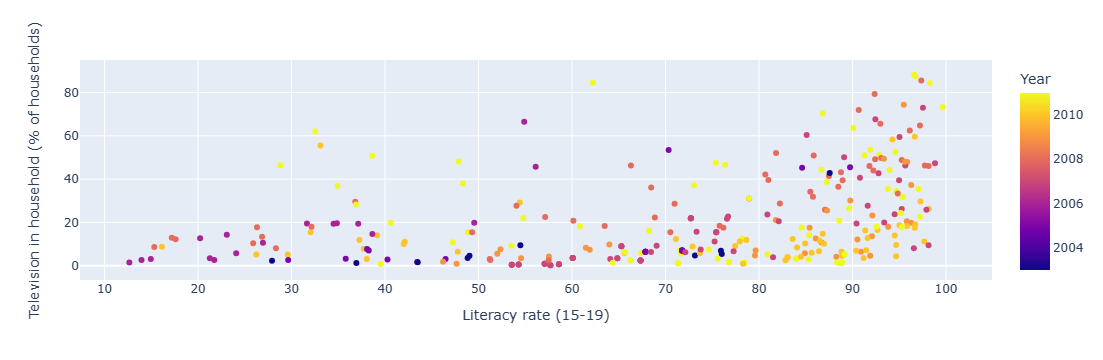

In [ ]:
# creating a scatter plot to visualize the relationship between Literacy rate (15-19) and Television in household (% of households)
px.scatter(data_frame= clean_data, x = 'Literacy rate (15-19)', y = 'Television in household (% of households)', color = 'Year')

The above visualization is just an interactive scatter plot of what has been generated before and it shows that there's a strong correlation between the Literacy rate (15-19) and Television in household.

The maximum Literacy rate (15-19) is 99.64202880859375


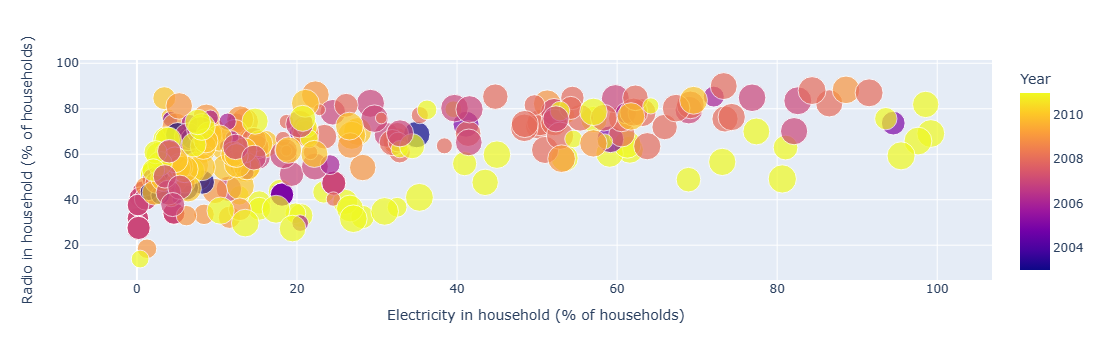

In [ ]:
print(f'The maximum Literacy rate (15-19) is {clean_data["Literacy rate (15-19)"].max()}') # printing the maximum value in the column
# creating a scatter plot to visualize the relationship between Literacy rate (15-19), Electricty and Radio in household (% of households)
px.scatter(data_frame= clean_data, x = 'Electricity in household (% of households)',
              y = 'Radio in household (% of households)',hover_name= 'Country name', size= 'Literacy rate (15-19)', color = 'Year')

The visualization shows relationship between literacy rate (15-19), electricity, media access, and education in different African countries. For example, Zimbabwe has the highest literacy rate of 99.64 among the countries listed, and also has relatively high rates of electricity, radio. This suggests that access to media has a strong impact on literacy rate among children within 15-19 ages range.

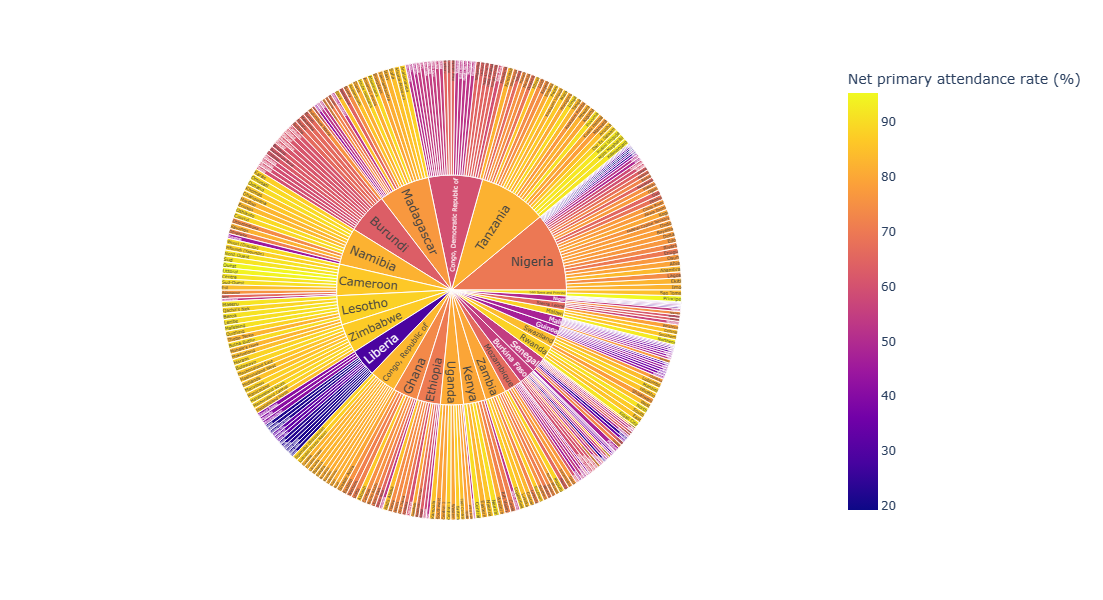

In [ ]:
# visualizing how NPAR(%) and Radio and/or TV affected the Literacy rate (15-19) across different countries, subnational regions
fig = px.sunburst(clean_data, path= ['Country name', 'Subnational region name'],
                  values= 'Literacy rate (15-19)',
                  color= 'Net primary attendance rate (%)',
                 hover_data= ['Radio and/or Television in household (% of population)'])
fig.show()

The above is an interactive `sunburst` that shows the relationship between `Literacy rate (15-19)`, `Net PAR` and `Radio and/TV` grouped by the `Countries` and `Substational regions`. It shows that the Literacy rate for ages between 15-19 is highly depends on the Net primary attendace rate.

**Note:** Click on any country to see the clear visualization of the those relationships based on `substational regions`

## Data Analysis <a name="Task4"></a>

In [5]:
# display the first 5 rows of the dataset.
clean_data.head()

Country name ISO code  ISO numeric code Subnational region name  \
0      Burundi      BDI               108                 Bubanza   
1      Burundi      BDI               108        Bujumbura Mairie   
2      Burundi      BDI               108         Bujumbura Rural   
3      Burundi      BDI               108                  Bururi   
4      Burundi      BDI               108                 Cankuzo   

   CCAPS subnational region ID  Year Data Source             Website  \
0                       108002  2011         DHS  www.measuredhs.com   
1                       108003  2011         DHS  www.measuredhs.com   
2                       108004  2011         DHS  www.measuredhs.com   
3                       108005  2011         DHS  www.measuredhs.com   
4                       108006  2011         DHS  www.measuredhs.com   

   Net primary attendance rate (%)  Primary NAR standard error  ...  \
0                        62.212669                    1.541257  ...   
1                        75.802948                    1.635965  ...   
2                        62.212669                    1.541257  ...   
3                        66.308830                    1.372277  ...   
4                        61.176640                    1.455065  ...   

   Electricity (% of hh) sample size  Radio in household (% of households)  \
0                             1441.0                             50.203342   
1                              912.0                             75.303909   
2                             1441.0                             50.203342   
3                             1921.0                             51.190273   
4                             2405.0                             51.336479   

   Radio (% of hh) standard error  Radio (% of hh) sample size  \
0                        1.984068                       1441.0   
1                        2.757758                        912.0   
2                        1.984068                       1441.0   
3                        1.153134                       1921.0   
4                        1.450344                       2405.0   

   Television in household (% of households)  \
0                                   1.656027   
1                                  44.327900   
2                                   1.656027   
3                                   3.321293   
4                                   1.289977   

   Television (% of hh) standard error  Television (% of hh) sample size  \
0                             0.644799                            1441.0   
1                             5.504890                             912.0   
2                             0.644799                            1441.0   
3                             1.444279                            1921.0   
4                             0.369800                            2405.0   

   Radio and/or television in household (% of households)  \
0                                          49.767658        
1                                          77.148560        
2                                          49.767658        
3                                          51.439995        
4                                          51.364285        

   Radio and/or TV (% of hh) standard error  \
0                                  1.906297   
1                                  2.845784   
2                                  1.906297   
3                                  1.158005   
4                                  1.450414   

   Radio and/or TV (% of hh) sample size  
0                                 1441.0  
1                                  912.0  
2                                 1441.0  
3                                 1921.0  
4                                 2405.0  

[5 rows x 68 columns]

In [ ]:
# checking the number of unique countries
clean_data['Country name'].nunique()

27

In [ ]:
# checking the number of unique years
clean_data['Year'].nunique()

8

In [ ]:
clean_data.describe()

ISO numeric code  CCAPS subnational region ID         Year  \
count        326.000000                   326.000000   326.000000   
mean         489.187117                489196.306748  2008.475460   
std          238.856633                238856.809033     2.089758   
min          108.000000                108002.000000  2003.000000   
25%          288.000000                288004.250000  2007.000000   
50%          487.000000                487005.000000  2008.000000   
75%          686.000000                686008.750000  2010.000000   
max          894.000000                894009.000000  2011.000000   

       Net primary attendance rate (%)  Primary NAR standard error  \
count                       326.000000                  326.000000   
mean                         67.709036                    2.802090   
std                          19.450906                    1.417553   
min                          19.211811                    0.502372   
25%                          54.770161                    1.616250   
50%                          73.775112                    2.505683   
75%                          83.660372                    3.541417   
max                          95.413872                    7.193609   

       Primary NAR sample size  Gross primary attendance rate (%)  \
count               326.000000                         326.000000   
mean               1087.165644                          99.154915   
std                1060.771927                          25.445972   
min                 212.000000                          25.051022   
25%                 678.000000                          85.932434   
50%                 900.000000                         102.600609   
75%                1228.500000                         116.893064   
max               14398.000000                         150.556335   

       Primary GAR standard error  Primary GAR sample size  \
count                  326.000000               326.000000   
mean                     4.493296              1089.966258   
std                      1.866895              1061.924454   
min                      1.029757               212.000000   
25%                      3.152429               678.250000   
50%                      3.892934               900.000000   
75%                      5.535463              1243.000000   
max                     10.625566             14405.000000   

       Net secondary attendance rate (%)  ...  \
count                         326.000000  ...   
mean                           27.919773  ...   
std                            18.028179  ...   
min                             1.837479  ...   
25%                            14.305085  ...   
50%                            24.035156  ...   
75%                            38.406351  ...   
max                            78.802788  ...   

       Electricity (% of hh) sample size  \
count                         326.000000   
mean                         1109.524540   
std                           903.970723   
min                           324.000000   
25%                           770.250000   
50%                           924.500000   
75%                          1210.000000   
max                         12090.000000   

       Radio in household (% of households)  Radio (% of hh) standard error  \
count                            326.000000                      326.000000   
mean                              58.948763                        2.690094   
std                               15.437248                        1.122522   
min                               13.913477                        0.797229   
25%                               47.460161                        1.951249   
50%                               60.218603                        2.529208   
75%                               70.597902                        3.066482   
max                               89.975082                        8.593001   

       Radio (% of hh)

**From the stastical summary above, we can infer the following for the Primary level:**

 - Year ranges from 2003 - 2011.
 - NPAR ranges from 19.2% - 95.4%.
 - NPAR error ranges from 0.5%-7.2%. This shows that the estimate is reliable.
 - NAR Sample size ranges from 212 to 14398. Average students who participated in the survey are 1087. The medium number of students who participated are 900.
 - GPAR ranges from 25.05% - 150.56%
 - GPAR error ranges from 1.0%-10.6%. The average is 4.49%, so the estimate is still reliable. The median is 3.89%, so we have more reliable estimate.
 - GAR Sample size ranges from 212 to 14405.

**Created below is a subset dataframe for secondary school.**

In [ ]:
clean_data1_subset = clean_data[['Net secondary attendance rate (%)','Secondary NAR standard error','Secondar NAR sample size','Gross secondary attendance rate (%)','Secondary GAR standard error','Secondary GAR sample size']]
clean_data1_subset.describe()

Net secondary attendance rate (%)  Secondary NAR standard error  \
count                         326.000000                    326.000000   
mean                           27.919773                      3.073192   
std                            18.028179                      1.415611   
min                             1.837479                      0.603776   
25%                            14.305085                      2.102229   
50%                            24.035156                      2.926195   
75%                            38.406351                      4.036954   
max                            78.802788                      8.510447   

       Secondar NAR sample size  Gross secondary attendance rate (%)  \
count                326.000000                           326.000000   
mean                 700.116564                            45.295048   
std                  462.014724                            28.260953   
min                  136.000000                             6.007842   
25%                  423.250000                            24.141747   
50%                  624.500000                            38.124609   
75%                  784.750000                            58.317075   
max                 4842.000000                           145.247025   

       Secondary GAR standard error  Secondary GAR sample size  
count                    326.000000                 326.000000  
mean                       4.733186                 703.128834  
std                        2.265847                 463.704205  
min                        1.335817                 136.000000  
25%                        3.201640                 424.250000  
50%                        4.224002                 627.000000  
75%                        5.763951                 793.000000  
max                       14.922399                4853.000000

**From the stastical summary above, we can infer the following for the Secondary level:**
 - ranges from 1.8% - 78.8%. The average is 27.9% while the median is 24%. This shows that there are fewer level of attendance rate in secondary schools compared to primary schools.
 - NSAR error ranges from 0.6%-8.5%. The average is 3.07 while the median is 2.93. This shows that the estimate is reliable.
 - SNAR Sample size ranges from 136 to 4842. Average students who participated in the survey are 700. These shows that we have fewer participants in secondary schools compared to primary schools.
 - GSAR ranges from 6% - 145.2%
 - GSAR error ranges from 1.3%-14.9%. The average is 4.7%.
 - SGAR Sample size ranges from 136 to 4853. These also shows that we have fewer participants in secondary schools compared to primary schools.

**Created below is a subset dataframe for Literacy Rate.**

In [ ]:
clean_data2_subset = clean_data[['Literacy rate (15 & over)','Literacy rate (15 & over) standard error','Literacy rate (15 & over) size','Literacy rate (15-24)','Literacy rate (15-24) standard error','Literacy rate (15-24) size','Literacy rate (15-19)','Literacy rate (15-19) standard error','Literacy rate (15-19) size','Literacy rate (25-49)','Literacy rate (25-49) standard error','Literacy rate (25-49) size']]
clean_data2_subset.describe()

Literacy rate (15 & over)  Literacy rate (15 & over) standard error  \
count                 326.000000                                326.000000   
mean                   61.552753                                  2.699233   
std                    24.770467                                  1.506230   
min                     9.497565                                  0.262115   
25%                    45.737465                                  1.587037   
50%                    66.046158                                  2.347179   
75%                    81.084305                                  3.567324   
max                    98.898605                                  8.128676   

       Literacy rate (15 & over) size  Literacy rate (15-24)  \
count                      326.000000             326.000000   
mean                      1657.880368              67.341702   
std                       1213.598905              23.499671   
min                        350.000000              10.415296   
25%                       1095.000000              52.582122   
50%                       1383.000000              71.510220   
75%                       1893.000000              87.065321   
max                      13994.000000              99.060966   

       Literacy rate (15-24) standard error  Literacy rate (15-24) size  \
count                            326.000000                  326.000000   
mean                               3.074293                  761.911043   
std                                1.700766                  548.434899   
min                                0.321787                  104.000000   
25%                                1.831306                  414.750000   
50%                                2.751606                  619.000000   
75%                                4.103223                  975.000000   
max                                9.101959                 5662.000000   

       Literacy rate (15-19)  Literacy rate (15-19) standard error  \
count             326.000000                            326.000000   
mean               70.920527                              3.596894   
std                22.077446                              2.049133   
min                12.650104                              0.266009   
25%                57.073219                              2.106736   
50%                75.682877                              3.277010   
75%                89.515299                              4.490479   
max                99.642029                             12.317142   

       Literacy rate (15-19) size  Literacy rate (25-49)  \
count                  326.000000             326.000000   
mean                   356.481595              57.398473   
std                    276.576796              26.180649   
min                     52.000000               4.976739   
25%                    213.500000              38.594544   
50%                    286.500000              61.137426   
75%                    420.500000              76.709452   
max                   3119.000000              98.748238   

       Literacy rate (25-49) standard error  Literacy rate (25-49) size  
count                            326.000000                  326.000000  
mean                               2.879631                  956.981595  
std                                1.527476                  699.538362  
min                                0.409799                  226.000000  
25%                                1.749002                  619.000000  
50%                                2.447449                  788.000000  
75%                                3.832068                 1105.500000  
max                                9.235173                 8181.000000

The summary above shows that we have more literates between the ages of 15-19. The record shows an average of 71.1% while the average literacy rate for ages 25-49 is 57.3%

In [ ]:
clean_data3_subset = clean_data[['Access to improved water (% of population)','Improved Water (% of pop) standard error','Improved Water (% of pop) sample size','Access to improved sanitation (% of population)','Improved Sanitation (% of pop) standard error','Improved Sanitation (% of pop) sample size','Electricity in household (% of population)','Electricity (% of pop) standard error','Electricity (% of pop) sample size']]
clean_data3_subset.describe()

Access to improved water (% of population)  \
count                                  326.000000   
mean                                    57.511355   
std                                     23.113989   
min                                      8.144560   
25%                                     39.115501   
50%                                     59.653912   
75%                                     74.836657   
max                                    100.000000   

       Improved Water (% of pop) standard error  \
count                                326.000000   
mean                                   5.212050   
std                                    2.435484   
min                                    0.000000   
25%                                    3.488064   
50%                                    5.031181   
75%                                    6.733635   
max                                   14.950254   

       Improved Water (% of pop) sample size  \
count                             326.000000   
mean                             5481.592025   
std                              4271.266569   
min                              1417.000000   
25%                              3695.750000   
50%                              4615.000000   
75%                              6195.250000   
max                             54841.000000   

       Access to improved sanitation (% of population)  \
count                                       326.000000   
mean                                         33.841375   
std                                          24.695321   
min                                           0.000000   
25%                                          11.984564   
50%                                          29.773585   
75%                                          49.175560   
max                                          97.717010   

       Improved Sanitation (% of pop) standard error  \
count                                     326.000000   
mean                                        3.579422   
std                                         1.974951   
min                                         0.000000   
25%                                         2.187223   
50%                                         3.321038   
75%                                         4.801082   
max                                         9.014301   

       Improved Sanitation (% of pop) sample size  \
count                                  326.000000   
mean                                  5476.785276   
std                                   4270.208232   
min                                   1417.000000   
25%                                   3686.000000   
50%                                   4615.000000   
75%                                   6195.250000   
max                                  54831.000000   

       Electricity in household (% of population)  \
count                                  326.000000   
mean                                    23.564629   
std                                     24.919460   
min                                      0.086054   
25%                                      4.918630   
50%                                     12.981708   
75%                                     33.116385   
max                                     99.171455   

       Electricity (% of pop) standard error  \
count                             326.000000   
mean                                3.531630   
std                                 2.569685   
min                                 0.049228   
25%                                 1.395761   
50%                                 3.157534   
75%                                 5.118983   
max                                13.054160   

       Electricity (% of pop) sample size  
count                          326.000000  
mean                          5478.205521  
std                           4267.518978  
min                           1417.000000  

From the summary above, average of 60% has access to improved water,average of 40% has access to improved sanitation and average of 28.9% has Electricity. *This shows that we majority of the population does not have electricity.

In [ ]:
# calculate and print out the average literacy rate (15 $ over) based on country in the dataset
clean_data.groupby('Country name')['Literacy rate (15 & over)'].mean().sort_values(ascending= False)

Country name
Zimbabwe                         93.928355
Swaziland                        90.502430
Sao Tome and Principe            90.364380
Lesotho                          89.786923
Namibia                          88.582423
Kenya                            81.439437
Rwanda                           79.245393
Cameroon                         77.059085
Tanzania                         74.696556
Congo, Republic of               74.043507
Malawi                           72.926140
Zambia                           71.307287
Madagascar                       69.107297
Burundi                          65.982956
Uganda                           64.797454
Ghana                            64.184906
Congo, Democratic Republic of    64.029406
Nigeria                          58.761310
Ethiopia                         53.772138
Liberia                          49.123057
Mozambique                       42.441970
Sierra Leone                     33.549954
Senegal                          32.88150

Based on the data, we can draw some conclusions about the literacy rate of different African countries. The highest literacy rate (of ages 15 and above) is found in Zimbabwe, with 93.9%, followed by Swaziland and Sao Tome and Principe, with 90.5% and 90.4%, respectively. These countries have invested in education and have relatively stable political and economic situations. The lowest literacy rate is found in Niger, with 19.7%, followed by Mali and Guinea, with 20.5% and 22.1%, respectively.

In [ ]:
# calculate and print out the average literacy rate (15-24) based on country in the dataset
clean_data.groupby('Country name')[['Literacy rate (15-24)',
            'Electricity in household (% of population)',
            'Radio in household (% of population)',
            'Television in household (% of population)',
            'Radio and/or Television in household (% of population)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of population)',
            'Access to improved sanitation (% of population)']].mean().sort_values(by = 'Literacy rate (15-24)',ascending= False)

Literacy rate (15-24)  \
Country name                                           
Zimbabwe                                   95.239231   
Swaziland                                  93.049969   
Sao Tome and Principe                      92.587036   
Lesotho                                    92.199160   
Namibia                                    91.724133   
Kenya                                      87.223510   
Rwanda                                     85.785176   
Tanzania                                   80.749273   
Cameroon                                   80.286004   
Malawi                                     79.841474   
Ghana                                      77.151634   
Congo, Republic of                         73.812449   
Burundi                                    73.167911   
Zambia                                     72.744751   
Uganda                                     71.986733   
Madagascar                                 71.533183   
Nigeria                                    67.243345   
Ethiopia                                   66.123357   
Congo, Democratic Republic of              64.939228   
Liberia                                    57.806010   
Mozambique                                 50.910816   
Sierra Leone                               50.477736   
Senegal                                    41.017687   
Guinea                                     36.746858   
Burkina Faso                               28.099884   
Mali                                       26.848783   
Niger                                      23.569333   

                               Electricity in household (% of population)  \
Country name                                                                
Zimbabwe                                                        32.983931   
Swaziland                                                       28.619128   
Sao Tome and Principe                                           60.420630   
Lesotho                                                         12.216634   
Namibia                                                         38.536254   
Kenya                                                           23.209148   
Rwanda                                                          15.711769   
Tanzania                                                        14.700484   
Cameroon                                                        56.920315   
Malawi                                                           8.740190   
Ghana                                                           50.060100   
Congo, Republic of                                              22.612413   
Burundi                                                          6.716882   
Zambia                                                          17.330090   
Uganda                                                          13.866447   
Madagascar                                                      11.781160   
Nigeria                                                         45.940441   
Ethiopia                                                        34.690625   
Congo, Democratic Republic of                                   11.293197   
Liberia                                                          1.772915   
Mozambique                                                       9.836136   
Sierra Leone                                                    14.447505   
Senegal                                                         49.148263   
Guinea                                                          19.608144   
Burkina Faso                                                     9.867982   
Mali                                                            18.770430   
Niger                                                           16.970569   

                               Radio in household (% of population)  \
Country name                                                          
Zimbabwe                      

Based on the data, some conclusions can be drawn about the relationship between literacy, electricity, media access, and education in different African countries. For example, Zimbabwe has the highest literacy rate among the countries listed, and also has relatively high rates of electricity, radio, television, and secondary education. On the other hand, Liberia has one of the lowest rates of electricity and media access, but has a high gross primary and secondary attendance rates and a high percentage of population with access to improved water. This suggests that there may be other factors influencing literacy and education outcomes, such as poverty, health, governance, and culture. A possible limitation of this analysis is that the data may not be up to date or accurate for some countries, and that the indicators may not capture the quality or diversity of the services provided.

In [ ]:
# calculate and print out the average literacy rate (25-49) based on country (Zimbabwe) in the dataset
clean_data[clean_data["Country name"] == "Zimbabwe"].groupby('Subnational region name')[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].mean().sort_values(by = 'Literacy rate (25-49)',ascending= False)

Literacy rate (25-49)  \
Subnational region name                          
Harare                               98.748238   
Bulawayo                             98.487694   
Midlands                             95.259079   
Manicaland                           94.658150   
Mashonaland East                     93.614372   
Mashonaland West                     92.999435   
Matabeleland South                   91.505882   
Masvingo                             91.151611   
Mashonaland Central                  89.010933   
Matabeleland North                   85.701019   

                         Electricity in household (% of households)  \
Subnational region name                                               
Harare                                                    80.641106   
Bulawayo                                                  95.481422   
Midlands                                                  30.955395   
Manicaland                                                27.044428   
Mashonaland East                                          17.387024   
Mashonaland West                                          35.299961   
Matabeleland South                                        10.457481   
Masvingo                                                  13.537781   
Mashonaland Central                                       26.618122   
Matabeleland North                                        19.449896   

                         Radio in household (% of households)  \
Subnational region name                                         
Harare                                              49.144642   
Bulawayo                                            59.296738   
Midlands                                            34.864094   
Manicaland                                          31.639475   
Mashonaland East                                    35.815819   
Mashonaland West                                    41.037724   
Matabeleland South                                  35.192932   
Masvingo                                            29.723146   
Mashonaland Central                                 36.145508   
Matabeleland North                                  27.319876   

                         Television in household (% of households)  \
Subnational region name                                              
Harare                                                   73.238182   
Bulawayo                                                 84.404930   
Midlands                                                 31.804312   
Manicaland                                               24.408123   
Mashonaland East                                         22.594398   
Mashonaland West                                         35.407200   
Matabeleland South                                       17.959377   
Masvingo                                                 17.946192   
Mashonaland Central                                      26.501904   
Matabeleland North                                       20.792814   

                         Radio and/or television in household (% of households)  \
Subnational region name                                                           
Harare                                                           80.158325        
Bulawayo                                                         89.353867        
Midlands                                                         48.983479        
Manicaland                                                       42.006451        
Mashonaland East                                                 45.313168        
Mashonaland West                                                 55.116207        
Matabeleland South                                               41.126629        
Masvingo                                                         36.774662        
Mashonaland Central                                              45.745556        
Matabeleland North                  

Based on the data, some conclusions can be drawn about the relationship between literacy, education, and access to media and basic services in different subnational regions of Zimbabwe. The data shows that Harare and Bulawayo have the highest literacy rates (25-49), as well as the highest percentages of households with electricity, radio, television, and access to improved water and sanitation. They also have the highest net secondary attendance rates, indicating that more children complete secondary education in these regions. On the other hand, Matabeleland North has the lowest literacy rate, as well as the lowest percentages of households with access to improved water and sanitation. It also has the lowest net primary and secondary attendance rates, suggesting that many children drop out of school in this region. The data also reveals some variations among the other regions, such as Midlands having a relatively high literacy rate but a low percentage of households with electricity, or Masvingo having a relatively low literacy rate but a high net primary attendance rate. These variations may reflect different historical, cultural, economic, and environmental factors that affect the development of each region.

In [ ]:
# calculate and print out the average literacy rate (25-49) based on country(Nigeria) in the dataset
clean_data[clean_data["Country name"] == "Nigeria"].groupby('Subnational region name')[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].mean().sort_values(by = 'Literacy rate (25-49)',ascending= False)

Literacy rate (25-49)  \
Subnational region name                            
Imo                                    90.942345   
Lagos                                  89.632256   
Anambra                                89.108521   
Abia                                   84.954483   
Rivers                                 83.360626   
Ekiti                                  81.643883   
Federal Capital Territory              77.400452   
Akwa Ibom                              77.047401   
Osun                                   75.848404   
Delta                                  74.226372   
Oyo                                    72.958908   
Edo                                    71.136108   
Bayelsa                                70.282082   
Ondo                                   69.758537   
Ogun                                   68.898605   
Enugu                                  64.519035   
Cross River                            63.608658   
Kogi                                   61.208767   
Kaduna                                 56.869720   
Plateau                                54.179996   
Kwara                                  46.706554   
Benue                                  46.171093   
Ebonyi                                 43.011768   
Nassarawa                              42.095440   
Taraba                                 40.774891   
Adamawa                                38.296787   
Gombe                                  37.809555   
Kano                                   37.436752   
Niger                                  25.790867   
Kebbi                                  24.945004   
Bauchi                                 23.166790   
Jigawa                                 18.882605   
Sokoto                                 17.409332   
Borno                                  16.979521   
Zamfara                                16.562485   
Yobe                                   14.722861   
Katsina                                13.298189   

                           Electricity in household (% of households)  \
Subnational region name                                                 
Imo                                                         62.080170   
Lagos                                                       91.488770   
Anambra                                                     84.362633   
Abia                                                        69.156517   
Rivers                                                      52.869328   
Ekiti                                                       63.117916   
Federal Capital Territory                                   73.320732   
Akwa Ibom                                                   58.340027   
Osun                                                        67.372063   
Delta                                                       63.770504   
Oyo                                                         62.288231   
Edo                                                         74.321320   
Bayelsa                                                     51.004463   
Ondo                                                        48.463352   
Ogun                                                        65.933929   
Enugu                                                       48.404827   
Cross River                                                 31.908972   
Kogi                                                        52.137386   
Kaduna                                                      54.412724   
Plateau                                                     14.641576   
Kwara                                                       54.214508   
Benue                                                       15.010175   
Ebonyi                                                      41.383053   
Nassarawa                                                   26.150742   
Taraba                                                      18.639093   
Adamawa                    

Based on the data, some conclusions can be drawn about the relationship between literacy rate, education attendance rate, and access to electricity, media, water and sanitation in different subnational regions of Nigeria. The data shows that Imo, Lagos and Anambra have the highest literacy rates among the 25-49 age group, as well as high rates of electricity, radio, television, water and sanitation access. They also have high rates of primary and secondary education attendance, both net and gross. On the other hand, Zamfara, Yobe and Katsina have the lowest literacy rates among the same age group, as well as low rates of electricity, media, water and sanitation access. They also have low rates of primary and secondary education attendance, especially net. These findings suggest that there is a positive correlation between literacy rate and the other indicators of development and well-being in the subnational regions of Nigeria.

In [ ]:
# calculate and print out the average literacy rate (25-49) based on subsational regions in the dataset
clean_data.groupby('Subnational region name')[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].mean().sort_values(by = 'Literacy rate (25-49)',ascending= False)

Literacy rate (25-49)  \
Subnational region name                          
Harare                               98.748238   
Bulawayo                             98.487694   
Khomas                               97.249489   
Nairobi                              96.720306   
Analamanga                           95.855331   
...                                        ...   
Kindia                                7.939994   
Labe                                  7.855099   
Tahoua                                7.709779   
Kankan                                6.319554   
Mamou                                 4.976739   

                         Electricity in household (% of households)  \
Subnational region name                                               
Harare                                                    80.641106   
Bulawayo                                                  95.481422   
Khomas                                                    82.580521   
Nairobi                                                   88.601662   
Analamanga                                                51.269733   
...                                                             ...   
Kindia                                                    20.153229   
Labe                                                       6.297669   
Tahoua                                                     5.051876   
Kankan                                                     4.167162   
Mamou                                                      6.907477   

                         Radio in household (% of households)  \
Subnational region name                                         
Harare                                              49.144642   
Bulawayo                                            59.296738   
Khomas                                              83.520691   
Nairobi                                             88.324867   
Analamanga                                          82.207214   
...                                                       ...   
Kindia                                              69.458977   
Labe                                                59.168465   
Tahoua                                              40.374863   
Kankan                                              75.458923   
Mamou                                               60.552341   

                         Television in household (% of households)  \
Subnational region name                                              
Harare                                                   73.238182   
Bulawayo                                                 84.404930   
Khomas                                                   72.949829   
Nairobi                                                  74.301979   
Analamanga                                               47.945667   
...                                                            ...   
Kindia                                                    7.803129   
Labe                                                      3.269989   
Tahoua                                                    2.715450   
Kankan                                                    2.681918   
Mamou                                                     2.915556   

                         Radio and/or television in household (% of households)  \
Subnational region name                                                           
Harare                                                           80.158325        
Bulawayo                                                         89.353867        
Khomas                                                           88.750038        
Nairobi                                                          92.475060        
Analamanga                                                       85.532776        
...                                                                    ...        
Kindia                       

Based on the data, some conclusions can be drawn about the relationship between literacy rate, access to electricity, media, education, water and sanitation in different subnational regions. For example, Harare, Bulawayo, Khomas and Nairobi have the highest literacy rates and also the highest percentages of households with electricity, television, improved water and improved sanitation. On the other hand, Kindia, Labe, Tahoua, Kankan and Mamou have the lowest literacy rates and also the lowest percentages of households with these amenities. This suggests that there is a positive correlation between literacy and development indicators. However, there are some exceptions and variations in the data. For instance, Analamanga has a high literacy rate but a low percentage of households with improved sanitation. Similarly, some regions have high percentages of households with radio but low percentages of households with television or electricity. This may reflect the availability and affordability of different media sources in different contexts. Therefore, it is important to consider the specific characteristics and challenges of each region when designing and implementing policies and programs to improve literacy and development outcomes.

In [ ]:
# calculate and print out the correlation between literacy rate (15 & over), NPAR and NSAR in the dataset
clean_data[['Literacy rate (15 & over)', 'Net primary attendance rate (%)', 'Net secondary attendance rate (%)']].corr()

Literacy rate (15 & over)  \
Literacy rate (15 & over)                           1.000000   
Net primary attendance rate (%)                     0.803734   
Net secondary attendance rate (%)                   0.573596   

                                   Net primary attendance rate (%)  \
Literacy rate (15 & over)                                 0.803734   
Net primary attendance rate (%)                           1.000000   
Net secondary attendance rate (%)                         0.553486   

                                   Net secondary attendance rate (%)  
Literacy rate (15 & over)                                   0.573596  
Net primary attendance rate (%)                             0.553486  
Net secondary attendance rate (%)                           1.000000

Based on the correlation matrix, we can draw some conclusions about the relationship between literacy rate, net primary attendance rate and net secondary attendance rate. The literacy rate has a strong positive correlation with both the primary and secondary attendance rates, indicating that higher literacy rates are associated with higher enrollment rates in schools. This could be due to various factors, such as the availability and quality of education, the opportunity cost of schooling, and the socio-economic status of the population. The primary and secondary attendance rates have a moderate positive correlation, suggesting that higher primary enrollment rates are linked to higher secondary enrollment rates. This could reflect the continuity and progression of education, the demand for higher skills, and the incentives and policies that encourage students to complete their education.

In [ ]:
# calculate and print out the correlation between literacy rate (15-24), NPAR and NSAR in the dataset
clean_data[['Literacy rate (15-24)', 'Net primary attendance rate (%)', 'Net secondary attendance rate (%)']].corr()

Literacy rate (15-24)  \
Literacy rate (15-24)                           1.000000   
Net primary attendance rate (%)                 0.796384   
Net secondary attendance rate (%)               0.579319   

                                   Net primary attendance rate (%)  \
Literacy rate (15-24)                                     0.796384   
Net primary attendance rate (%)                           1.000000   
Net secondary attendance rate (%)                         0.553486   

                                   Net secondary attendance rate (%)  
Literacy rate (15-24)                                       0.579319  
Net primary attendance rate (%)                             0.553486  
Net secondary attendance rate (%)                           1.000000

Based on the given data, we can draw some conclusions about the relationship between literacy rate and school attendance rate in a certain population. First, we can see that there is a strong positive correlation between literacy rate (15-24) and net primary attendance rate (%), with a coefficient of 0.796384. This means that the higher the percentage of children who attend primary school, the higher the percentage of young adults who are literate. Second, we can see that there is a moderate positive correlation between literacy rate (15-24) and net secondary attendance rate (%), with a coefficient of 0.579319. This means that the higher the percentage of children who attend secondary school, the higher the percentage of young adults who are literate, but the effect is weaker than that of primary school. Third, we can see that there is a weak positive correlation between net primary attendance rate (%) and net secondary attendance rate (%), with a coefficient of 0.553486. This means that the higher the percentage of children who attend primary school, the slightly higher the percentage of children who attend secondary school, but the effect is not very strong. These conclusions suggest that improving primary school attendance is more effective than improving secondary school attendance in increasing literacy rate among young adults.

In [ ]:
# calculate and print out the correlation between literacy rate (15-19), NPAR and NSAR in the dataset
clean_data[['Literacy rate (15-19)', 'Net primary attendance rate (%)', 'Net secondary attendance rate (%)']].corr()

Literacy rate (15-19)  \
Literacy rate (15-19)                           1.000000   
Net primary attendance rate (%)                 0.807269   
Net secondary attendance rate (%)               0.554396   

                                   Net primary attendance rate (%)  \
Literacy rate (15-19)                                     0.807269   
Net primary attendance rate (%)                           1.000000   
Net secondary attendance rate (%)                         0.553486   

                                   Net secondary attendance rate (%)  
Literacy rate (15-19)                                       0.554396  
Net primary attendance rate (%)                             0.553486  
Net secondary attendance rate (%)                           1.000000

Based on the data, we can draw some conclusions about the relationship between literacy rate and school attendance rate in a certain population. First, we can see that there is a strong positive correlation between literacy rate (15-19) and net primary attendance rate (%), with a coefficient of 0.807269. This means that the higher the percentage of children who attend primary school, the higher the literacy rate of the 15-19 age group. Second, we can see that there is a moderate positive correlation between literacy rate (15-19) and net secondary attendance rate (%), with a coefficient of 0.554396. This means that the higher the percentage of children who attend secondary school, the higher the literacy rate of the 15-19 age group, but not as strongly as for primary school. Third, we can see that there is also a moderate positive correlation between net primary attendance rate (%) and net secondary attendance rate (%), with a coefficient of 0.553486. This means that the higher the percentage of children who attend primary school, the higher the percentage of children who attend secondary school, but not as strongly as for literacy rate. These results suggest that improving school attendance rates at both primary and secondary levels can have a positive impact on literacy rates among young people.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49), NPAR and NSAR in the dataset
clean_data[['Literacy rate (25-49)', 'Net primary attendance rate (%)', 'Net secondary attendance rate (%)']].corr()

Literacy rate (25-49)  \
Literacy rate (25-49)                           1.000000   
Net primary attendance rate (%)                 0.786296   
Net secondary attendance rate (%)               0.560555   

                                   Net primary attendance rate (%)  \
Literacy rate (25-49)                                     0.786296   
Net primary attendance rate (%)                           1.000000   
Net secondary attendance rate (%)                         0.553486   

                                   Net secondary attendance rate (%)  
Literacy rate (25-49)                                       0.560555  
Net primary attendance rate (%)                             0.553486  
Net secondary attendance rate (%)                           1.000000

Based on the data given, we can draw some conclusions about the relationship between literacy rate and school attendance rate in a certain population. First, we can see that there is a strong positive correlation between literacy rate and net primary attendance rate, with a coefficient of 0.786296. This means that higher literacy rate is associated with higher primary school enrollment and completion. Second, we can see that there is a moderate positive correlation between literacy rate and net secondary attendance rate, with a coefficient of 0.560555. This means that higher literacy rate is also associated with higher secondary school enrollment and completion, but the relationship is weaker than for primary education. Third, we can see that there is a weak positive correlation between net primary attendance rate and net secondary attendance rate, with a coefficient of 0.553486. This means that higher primary school enrollment and completion does not necessarily lead to higher secondary school enrollment and completion, and there may be other factors influencing the transition from primary to secondary education.

In [ ]:
# calculate and print out the correlation between literacy rate (15 & over) and educational infrastructures in the dataset
clean_data[['Literacy rate (15 & over)',
            'Electricity in household (% of population)',
            'Radio in household (% of population)',
            'Television in household (% of population)',
            'Radio and/or Television in household (% of population)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Access to improved water (% of population)',
            'Access to improved sanitation (% of population)'
           ]].corr()['Literacy rate (15 & over)']

Literacy rate (15 & over)                                 1.000000
Electricity in household (% of population)                0.349451
Radio in household (% of population)                      0.155513
Television in household (% of population)                 0.391190
Radio and/or Television in household (% of population)    0.232554
Net primary attendance rate (%)                           0.803734
Net secondary attendance rate (%)                         0.573596
Gross primary attendance rate (%)                         0.743745
Gross primary attendance rate (%)                         0.743745
Access to improved water (% of population)                0.414820
Access to improved sanitation (% of population)           0.304994
Name: Literacy rate (15 & over), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is positively correlated with electricity in household, television in household, net primary and secondary attendance rates, and access to improved water and sanitation. This suggests that higher levels of literacy are associated with better living conditions and educational opportunities. Second, we can see that literacy rate is not strongly correlated with radio in household and radio and/or television in household. This implies that lower levels of literacy are linked to more reliance on radio as a source of information and entertainment. Third, we can see that the correlations are not very strong, ranging from 0.15 to 0.80. This indicates that literacy rate is not the only factor that influences development, and that there may be other variables that affect the outcomes.

In [ ]:
# calculate and print out the correlation between literacy rate (15-19) and educational infrastructures in the dataset
clean_data[['Literacy rate (15-19)',
            'Electricity in household (% of population)',
            'Radio in household (% of population)',
            'Television in household (% of population)',
            'Radio and/or Television in household (% of population)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Access to improved water (% of population)',
            'Access to improved sanitation (% of population)'
           ]].corr()['Literacy rate (15-19)']

Literacy rate (15-19)                                     1.000000
Electricity in household (% of population)                0.321748
Radio in household (% of population)                      0.164924
Television in household (% of population)                 0.357171
Radio and/or Television in household (% of population)    0.231013
Net primary attendance rate (%)                           0.807269
Net secondary attendance rate (%)                         0.554396
Gross primary attendance rate (%)                         0.747752
Gross primary attendance rate (%)                         0.747752
Access to improved water (% of population)                0.427168
Access to improved sanitation (% of population)           0.291555
Name: Literacy rate (15-19), dtype: float64

Based on the data, we can draw some conclusions about the relationship between `literacy rate` and other indicators of development. First, we can see that `literacy rate` is positively correlated with `electricity, radio, television, and water access`, meaning that higher literacy rates are associated with higher levels of these variables. Second, we can see that `literacy rate` is also positively correlated with `primary and secondary school attendance rates`, indicating that higher `literacy rates` are linked to higher educational attainment. Third, we can see that `literacy rate` is not strongly correlated with radio in household and radio and/or television access, meaning that literacy rates are associated less with levels of media exposure. This could suggest that media exposure may have a little impact on literacy or that literacy may not necessarily be a priority for households with media access. Finally, we can see that literacy rate is weakly correlated with `sanitation access`, meaning that there is no clear relationship between these two variables. This could imply that sanitation access is influenced by other factors besides literacy or that literacy does not have a significant effect on sanitation.

In [ ]:
# calculate and print out the correlation between literacy rate (15-24) and educational infrastructures in the dataset
clean_data[['Literacy rate (15-24)',
            'Electricity in household (% of population)',
            'Radio in household (% of population)',
            'Television in household (% of population)',
            'Radio and/or Television in household (% of population)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Access to improved water (% of population)',
            'Access to improved sanitation (% of population)'
           ]].corr()['Literacy rate (15-24)']

Literacy rate (15-24)                                     1.000000
Electricity in household (% of population)                0.352403
Radio in household (% of population)                      0.178035
Television in household (% of population)                 0.383496
Radio and/or Television in household (% of population)    0.247669
Net primary attendance rate (%)                           0.796384
Net secondary attendance rate (%)                         0.579319
Gross primary attendance rate (%)                         0.741214
Gross primary attendance rate (%)                         0.741214
Access to improved water (% of population)                0.438657
Access to improved sanitation (% of population)           0.309468
Name: Literacy rate (15-24), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is positively correlated with electricity, television, and access to improved water and sanitation. This suggests that these factors may enhance or reflect the quality of education and learning opportunities for young people. Second, we can see that literacy rate is not strongly correlated with radio or radio and/or television. This implies that these media sources may not be very effective or relevant for promoting literacy skills. Third, we can see that literacy rate is moderately correlated with net primary and secondary attendance rates, but less so with gross primary attendance rate. This indicates that there may be some inefficiencies or dropouts in the primary education system, or that some children may start school late or repeat grades. Therefore, we can conclude that literacy rate is influenced by multiple dimensions of development, and that improving literacy requires addressing both the supply and demand factors of education.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset
clean_data[['Literacy rate (25-49)',
            'Electricity in household (% of population)',
            'Radio in household (% of population)',
            'Television in household (% of population)',
            'Radio and/or Television in household (% of population)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of population)',
            'Access to improved sanitation (% of population)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of population)                0.341528
Radio in household (% of population)                      0.139077
Television in household (% of population)                 0.386238
Radio and/or Television in household (% of population)    0.217629
Net primary attendance rate (%)                           0.786296
Net secondary attendance rate (%)                         0.560555
Gross primary attendance rate (%)                         0.724842
Gross secondary attendance rate (%)                       0.465164
Access to improved water (% of population)                0.388297
Access to improved sanitation (% of population)           0.293789
Name: Literacy rate (25-49), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is positively correlated with electricity in household, television in household, net primary and secondary attendance rate, and access to improved water and sanitation. This suggests that higher literacy levels are associated with better living conditions and educational opportunities. Second, we can see that literacy rate is weakly correlated with radio in household and radio and/or television in household. This implies that literacy rate is not strongly influenced by the availability of mass media or information sources. Third, we can see that there is a strong correlation between literacy rate and gross primary attendance rate. This indicates that literacy rate is affected by the total number of children enrolled in primary education.

In [ ]:
# calculate and print out the correlation between literacy rate (15 & over) and educational infrastructures in the dataset
clean_data[['Literacy rate (15 & over)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (15 & over)']

Literacy rate (15 & over)                                 1.000000
Electricity in household (% of households)                0.367605
Radio in household (% of households)                      0.186377
Television in household (% of households)                 0.406220
Radio and/or television in household (% of households)    0.256863
Net primary attendance rate (%)                           0.803734
Net secondary attendance rate (%)                         0.573596
Gross primary attendance rate (%)                         0.743745
Gross secondary attendance rate (%)                       0.488655
Access to improved water (% of households)                0.425766
Access to improved sanitation (% of households)           0.322580
Name: Literacy rate (15 & over), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is positively correlated with electricity, television, and access to improved water and sanitation. This suggests that literate people have higher living standards and more opportunities to access information and services. Second, we can see that literacy rate is also positively correlated with primary and secondary attendance rates, both net and gross. This implies that literate people value education and are more likely to enroll and complete their schooling. Third, we can see that literacy rate is weakly correlated with radio ownership and radio and/or television ownership. This may indicate that literate people prefer other sources of information and entertainment, such as books, newspapers, or the internet. Alternatively, it may reflect the low availability or affordability of radios in some areas.

In [ ]:
# calculate and print out the correlation between literacy rate (15-19) and educational infrastructures in the dataset
clean_data[['Literacy rate (15-19)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (15-19)']

Literacy rate (15-19)                                     1.000000
Electricity in household (% of households)                0.343916
Radio in household (% of households)                      0.193943
Television in household (% of households)                 0.374972
Radio and/or television in household (% of households)    0.254352
Net primary attendance rate (%)                           0.807269
Net secondary attendance rate (%)                         0.554396
Gross primary attendance rate (%)                         0.747752
Gross secondary attendance rate (%)                       0.485163
Access to improved water (% of households)                0.438686
Access to improved sanitation (% of households)           0.311801
Name: Literacy rate (15-19), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is positively correlated with electricity, radio, television, and access to improved water and sanitation. This suggests that literate people are more likely to have better living conditions and access to information and communication technologies. Second, we can see that literacy rate is also positively correlated with primary and secondary attendance rates. This implies that literate people are more likely to enroll and complete their education, or that education promotes literacy. However, we cannot infer causality from these correlations, and we need to consider other factors that may affect literacy and development, such as income, gender, culture, and policies.

In [ ]:
# calculate and print out the correlation between literacy rate (15-24) and educational infrastructures in the dataset
clean_data[['Literacy rate (15-24)',
           'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (15-24)']

Literacy rate (15-24)                                     1.000000
Electricity in household (% of households)                0.374539
Radio in household (% of households)                      0.208194
Television in household (% of households)                 0.400925
Radio and/or television in household (% of households)    0.271929
Net primary attendance rate (%)                           0.796384
Net secondary attendance rate (%)                         0.579319
Gross primary attendance rate (%)                         0.741214
Gross secondary attendance rate (%)                       0.517320
Access to improved water (% of households)                0.450704
Access to improved sanitation (% of households)           0.329287
Name: Literacy rate (15-24), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is positively correlated with electricity, television, and access to improved water and sanitation. This suggests that literate people have higher living standards and more opportunities to access information and services. Second, we can see that literacy rate is also positively correlated with primary and secondary attendance rates, both net and gross. This implies that literate people value education and are more likely to enroll and complete their schooling. Third, we can see that literacy rate is weakly correlated with radio ownership and usage. This may indicate that radio is a less preferred or less effective medium of communication and education for literate people. Alternatively, it may reflect the lower availability or affordability of radio in areas with higher literacy rates.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset
clean_data[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.357452
Radio in household (% of households)                      0.170560
Television in household (% of households)                 0.400246
Radio and/or television in household (% of households)    0.242428
Net primary attendance rate (%)                           0.786296
Net secondary attendance rate (%)                         0.560555
Gross primary attendance rate (%)                         0.724842
Gross secondary attendance rate (%)                       0.465164
Access to improved water (% of households)                0.398397
Access to improved sanitation (% of households)           0.309805
Name: Literacy rate (25-49), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate has a positive correlation with electricity, television, and access to improved water and sanitation. This suggests that literate people have higher living standards and more opportunities to access information and services. Second, we can see that literacy rate has a stroger correlation with net primary and secondary attendance rates, both net and gross. This implies that literacy is strongly influenced by the quality of education and also indicates that literate people tend to complete their education regardless of their ages and do not repeat grades or drop out. In conclusion, literacy rate is an important indicator of development that reflects the economic, social, and educational status of a population.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset for the year 2003
clean_data.query(f"Year == {2003}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.867087
Radio in household (% of households)                      0.441405
Television in household (% of households)                 0.842566
Radio and/or television in household (% of households)    0.493237
Net primary attendance rate (%)                           0.931148
Net secondary attendance rate (%)                         0.900271
Gross primary attendance rate (%)                         0.923279
Gross secondary attendance rate (%)                       0.841679
Access to improved water (% of households)                0.846605
Access to improved sanitation (% of households)           0.765440
Name: Literacy rate (25-49), dtype: float64

Based on the data for the year 2003, we can draw some conclusions about the literacy rate (25-49) and its relationship with other indicators of development. The literacy rate (25-49) has a strong positive correlation with the percentage of households that have electricity, television, and access to improved water and sanitation. This suggests that higher levels of education are associated with better living standards and access to basic services. The literacy rate (25-49) also has a very strong positive correlation with the net and gross attendance rates for primary and secondary education. This implies that higher levels of adult literacy can foster more participation and retention in the formal education system. However, the literacy rate (25-49) has a weak negative correlation with the percentage of households that have radio or radio and/or television. This may indicate that radio is a more accessible and affordable source of information and entertainment for less educated populations.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset for the year 2005
clean_data.query(f"Year == {2005}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.339330
Radio in household (% of households)                     -0.363055
Television in household (% of households)                 0.379826
Radio and/or television in household (% of households)   -0.254875
Net primary attendance rate (%)                           0.975940
Net secondary attendance rate (%)                         0.825159
Gross primary attendance rate (%)                         0.933981
Gross secondary attendance rate (%)                       0.785506
Access to improved water (% of households)                0.642017
Access to improved sanitation (% of households)          -0.204971
Name: Literacy rate (25-49), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development for the year 2005. First, we can see that there is a strong positive correlation between literacy rate and electricity in household, television in household, net primary and secondary attendance rate, gross primary and secondary attendance rate, and access to improved water. This suggests that higher literacy levels are associated with better access to basic services and higher educational attainment. Second, we can see that there is a moderate negative correlation between literacy rate and radio in household, and a weak negative correlation between literacy rate and radio and/or television in household, and access to improved sanitation. This suggests that higher literacy levels are not necessarily linked to higher media exposure or better hygiene practices. These findings have implications for policy makers and practitioners who aim to improve literacy and development outcomes in different contexts.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset for the year 2006
clean_data.query(f"Year == {2006}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.971700
Radio in household (% of households)                      0.496495
Television in household (% of households)                 0.892495
Radio and/or television in household (% of households)    0.587051
Net primary attendance rate (%)                           0.893040
Net secondary attendance rate (%)                         0.838164
Gross primary attendance rate (%)                         0.881151
Gross secondary attendance rate (%)                       0.860145
Access to improved water (% of households)                0.849363
Access to improved sanitation (% of households)           0.588520
Name: Literacy rate (25-49), dtype: float64

Based on the data for the year 2006, we can draw some conclusions about the literacy rate and its relation to other indicators of development. The literacy rate (25-49) is 100%, which means that all people in this age group can read and write. This is a remarkable achievement that reflects the high quality of education in the country. The literacy rate is also positively correlated with the percentage of households that have electricity, television, and access to improved water. These variables indicate a high standard of living and access to basic services. However, the literacy rate is moderately correlated with the percentage of households that have radio, radio and/or television, and access to improved sanitation. These variables suggest a moderate level of information, communication, and hygiene. Moreover, the attendance rates for primary and secondary education are highly correlated with the literacy rate, which implies that some people may have acquired literacy skills within the formal schooling system or that there is a low dropout rate. Therefore, we can conclude that while the literacy rate is a commendable indicator of development, it does capture the whole picture of the country's situation and needs.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset for the year 2007
clean_data.query(f"Year == {2007}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.758508
Radio in household (% of households)                      0.806573
Television in household (% of households)                 0.787956
Radio and/or television in household (% of households)    0.820750
Net primary attendance rate (%)                           0.910983
Net secondary attendance rate (%)                         0.913002
Gross primary attendance rate (%)                         0.770830
Gross secondary attendance rate (%)                       0.882775
Access to improved water (% of households)                0.450164
Access to improved sanitation (% of households)           0.500747
Name: Literacy rate (25-49), dtype: float64

Based on the data for the year 2007, we can draw some conclusions about the relationship between literacy rate and other indicators of development. First, we can see that literacy rate is highly correlated with electricity, radio and television access in households, suggesting that these factors are important for enhancing education and information dissemination. Second, we can observe that literacy rate is also positively associated with net primary and secondary attendance rates, indicating that higher levels of schooling are achieved by literate adults. Third, we can notice that literacy rate is moderately correlated with access to improved water and sanitation, implying that these aspects of health and hygiene are also influenced by literacy skills. Therefore, we can conclude that literacy rate is a key indicator of development and well-being in a society.

In [ ]:
# calculate and print out the correlation between literacy rate (25-49) and educational infrastructures in the dataset for the year 2005
clean_data.query(f"Year == {2008}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.862753
Radio in household (% of households)                      0.598677
Television in household (% of households)                 0.880287
Radio and/or television in household (% of households)    0.676641
Net primary attendance rate (%)                           0.812131
Net secondary attendance rate (%)                         0.922162
Gross primary attendance rate (%)                         0.576762
Gross secondary attendance rate (%)                       0.814864
Access to improved water (% of households)                0.405065
Access to improved sanitation (% of households)           0.460725
Name: Literacy rate (25-49), dtype: float64

Based on the data for the year 2008, we can draw some conclusions about the literacy rate (25-49) and its relationship with other indicators of development. First, we can see that there is a strong positive correlation between literacy rate and electricity in household, television in household, and net secondary attendance rate. This suggests that higher levels of literacy are associated with better access to modern amenities and higher levels of education. Second, we can see that there is a moderate positive correlation between literacy rate and radio in household, radio and/or television in household, gross primary attendance rate, access to improved water, and access to improved sanitation. This suggests that higher levels of literacy are also related to better access to information and communication media, as well as basic services. Third, we can see that there is a strong positive correlation between literacy rate and net primary attendance rate, and a weak positive correlation between literacy rate and gross primary attendance rate. This suggests that higher levels of literacy may necessarily imply higher levels of primary education enrollment or completion.uman waste.

In [ ]:

clean_data.query(f"Year == {2009}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.514867
Radio in household (% of households)                      0.875219
Television in household (% of households)                 0.608308
Radio and/or television in household (% of households)    0.885362
Net primary attendance rate (%)                           0.861177
Net secondary attendance rate (%)                         0.697803
Gross primary attendance rate (%)                         0.662222
Gross secondary attendance rate (%)                       0.761434
Access to improved water (% of households)                0.545497
Access to improved sanitation (% of households)           0.427625
Name: Literacy rate (25-49), dtype: float64

Based on the data for the year 2009, we can draw some conclusions about the literacy rate and its relationship with other indicators of development. The literacy rate (25-49) is positively correlated with the electricity in household, television in household, net primary and secondary attendance rate, and access to improved water and sanitation. This suggests that higher levels of literacy are associated with better living conditions, access to information, and educational opportunities. However, the literacy rate is strongly correlated with the radio in household or the radio and/or television in household. This implies that having a radio or a television alone is enough to improve literacy, and that other factors such as quality of education, availability of books, and motivation to learn are also important and most likely lead to effective learning outcomes.

In [ ]:

clean_data.query(f"Year == {2010}")[['Literacy rate (25-49)',
            'Electricity in household (% of households)',
            'Radio in household (% of households)',
            'Television in household (% of households)',
            'Radio and/or television in household (% of households)',
            'Net primary attendance rate (%)',
            'Net secondary attendance rate (%)',
            'Gross primary attendance rate (%)',
            'Gross secondary attendance rate (%)',
            'Access to improved water (% of households)',
            'Access to improved sanitation (% of households)'
           ]].corr()['Literacy rate (25-49)']

Literacy rate (25-49)                                     1.000000
Electricity in household (% of households)                0.240709
Radio in household (% of households)                     -0.182987
Television in household (% of households)                 0.157550
Radio and/or television in household (% of households)   -0.169882
Net primary attendance rate (%)                           0.856546
Net secondary attendance rate (%)                         0.488895
Gross primary attendance rate (%)                         0.806841
Gross secondary attendance rate (%)                       0.565249
Access to improved water (% of households)                0.409778
Access to improved sanitation (% of households)           0.175346
Name: Literacy rate (25-49), dtype: float64

Based on the data, we can draw some conclusions about the relationship between literacy rate and other indicators of development for the year 2010. First, we can see that there is a strong positive correlation between literacy rate and electricity in household, net primary and secondary attendance rate, gross primary and secondary attendance rate, and access to improved water and sanitation. This suggests that higher literacy levels are associated with better living conditions, access to basic services, and educational opportunities. Second, we can see that there is a weak negative correlation between literacy rate and radio in household, and radio and/or television in household. This suggests that higher literacy levels are not necessarily linked to higher media exposure or consumption. It is possible that people with higher literacy levels have other sources of information or entertainment, or that they have different preferences or needs for media use.

## Feature Engineering <a name="Task5"></a>

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 366
Data columns (total 68 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country name                                            326 non-null    object 
 1   ISO code                                                326 non-null    object 
 2   ISO numeric code                                        326 non-null    int64  
 3   Subnational region name                                 326 non-null    object 
 4   CCAPS subnational region ID                             326 non-null    int64  
 5   Year                                                    326 non-null    int64  
 6   Data Source                                             326 non-null    object 
 7   Website                                                 326 non-null    object 
 8   Net primary attendance rate (%)         

In [25]:
train = clean_data[['Country name','Literacy rate (15-19)','Literacy rate (25-49)','Literacy rate (15 & over)','Literacy rate (15-24)',
                    'Electricity in household (% of population)','Radio in household (% of population)',
                    'Television in household (% of population)','Radio and/or Television in household (% of population)',
                    'Net primary attendance rate (%)','Net secondary attendance rate (%)',
                    'Access to improved water (% of population)','Access to improved sanitation (% of population)']]


# Create a new column 'Mean_Literacy_Rate' that is the mean of the four features
train['Mean_Literacy_Rate'] = train[['Literacy rate (15-19)', 'Literacy rate (25-49)', 'Literacy rate (15 & over)', 'Literacy rate (15-24)']].mean(axis=1)

train = train.drop(['Literacy rate (15-19)','Literacy rate (25-49)','Literacy rate (15 & over)','Literacy rate (15-24)'], axis=1)

In [ ]:
cols = train.columns

for col in cols:
    plt.hist(train[col], bins=10)
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = train.drop(['Mean_Literacy_Rate'], axis=1)
y = train['Mean_Literacy_Rate']

X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2,random_state = 42)

## Model Training and Testing <a name="Task6"></a>

### Baseline Model

In [17]:
y_mean = y_train.mean()

y_pred_baseline = [y_mean] * len(y_train)



mean_squared_error(y_train,y_pred_baseline)

571.6912276727468

In [11]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor



# Instantiate model
rf_reg = RandomForestRegressor(random_state = 42)
lr = LinearRegression()
poly_reg_model = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# Fit model
lr.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
rf_reg.fit(X_train, y_train)



#Predict test set and display the result
models = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest Regression']
mae_scores = []
mse_scores = []
r2_scores = []

for model in [lr, ridge, lasso, rf_reg]:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


data = {'Model': models, 'Mean Absolute Error (MAE)': mae_scores,'Mean Squared Error (MSE)': mse_scores, 'R-squared (R^2)': r2_scores}
metrics_df = pd.DataFrame(data)

metrics_df

Model  Mean Absolute Error (MAE)  \
0         Linear Regression                   8.273443   
1                     Ridge                   8.273678   
2                     Lasso                   8.428654   
3  Random Forest Regression                   5.552830   

   Mean Squared Error (MSE)  R-squared (R^2)  
0                107.913475         0.800119  
1                107.915989         0.800114  
2                109.923724         0.796395  
3                 69.516039         0.871240

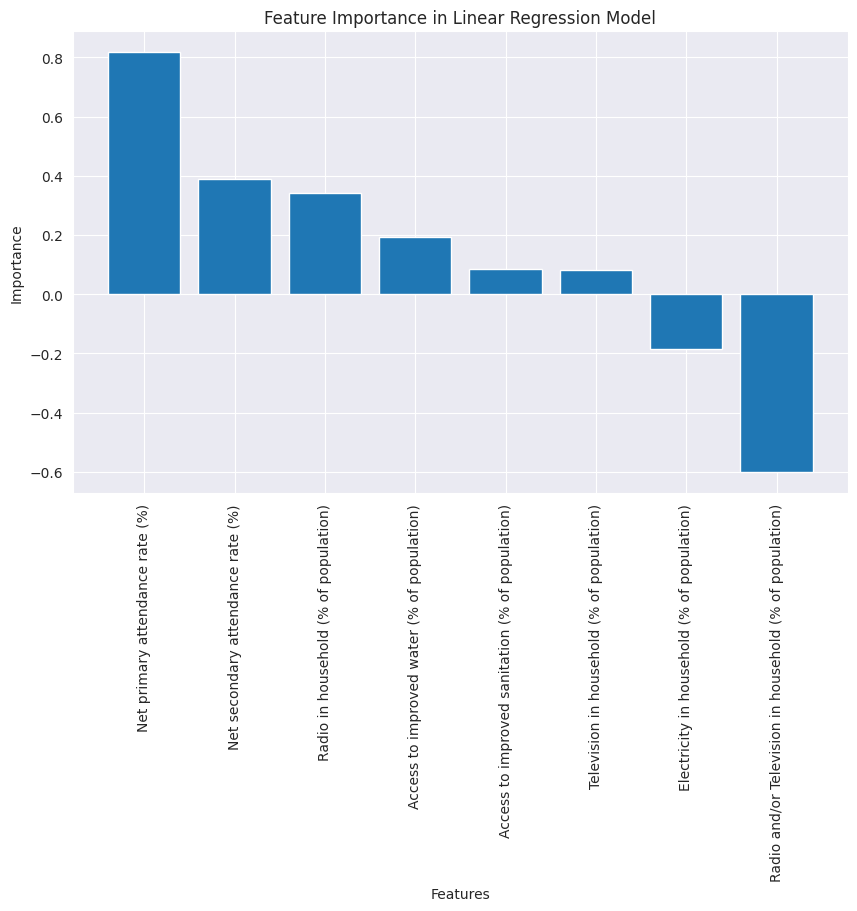

In [12]:
lr_importance = lr.coef_
colum= X.columns

feat_imp = pd.DataFrame({"columns":colum, "feature" : lr_importance})

feat_imp = feat_imp.sort_values(by="feature", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feat_imp['columns'],feat_imp['feature'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Linear Regression Model')
plt.show()

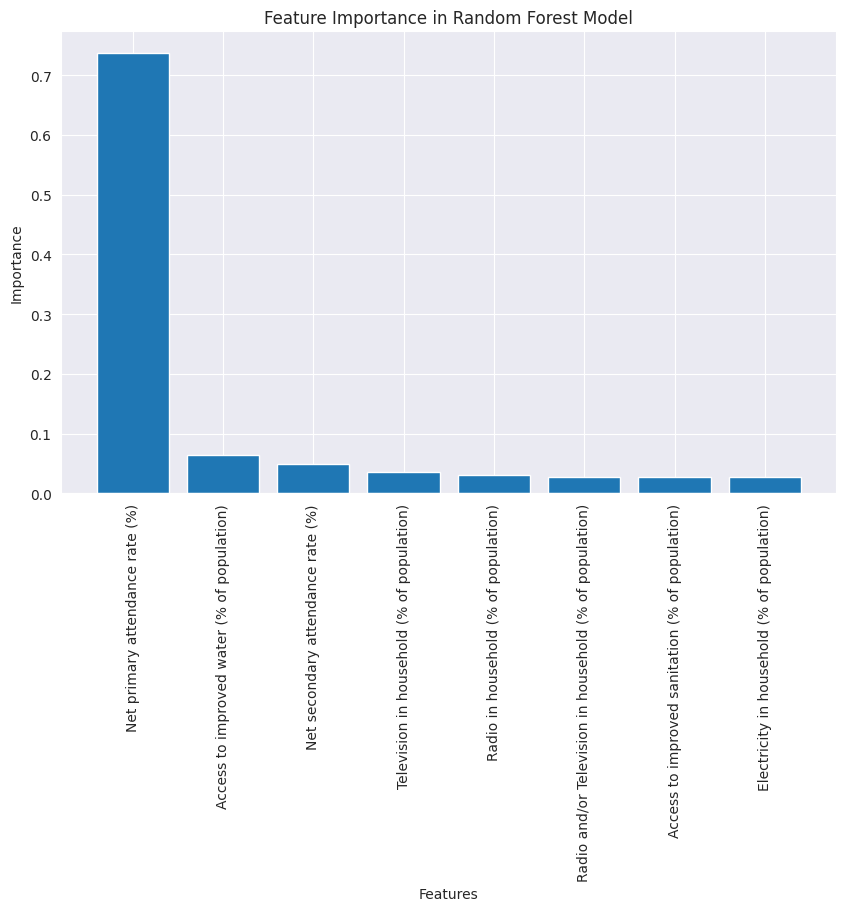

In [13]:
rf_importance = model.feature_importances_
colum= X.columns

feat_imp = pd.DataFrame({"columns":colum, "feature" : rf_importance})

feat_imp = feat_imp.sort_values(by="feature", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feat_imp['columns'],feat_imp['feature'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [21]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 954.5 kB/s eta 0:00:00


In [27]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder

model = make_pipeline(OneHotEncoder(use_cat_names=True),
                      Ridge()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Country name'], use_cat_names=True)),
                ('ridge', Ridge())])

In [28]:
    y_pred= model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(mse)
    print(r2)

53.83681112211488
0.9002813986686011


In [37]:
def make_prediction(Country_name, Electricity,Radio,TV,Radio_Tv,pry_School,Sec_School,Water, Sanitation):
    data = {
        "Country name": Country_name,
        "Electricity in household (% of population)": Electricity,
        "Radio in household (% of population)": Radio,
        "Television in household (% of population)": TV,
        "Radio and/or Television in household (% of population)": Radio_Tv,
        "Net primary attendance rate (%)" : pry_School,
        "Net secondary attendance rate (%)" : Sec_School,
        "Access to improved water (% of population)": Water,
        "Access to improved sanitation (% of population)": Sanitation

    }
    df= pd.DataFrame(data , index=[0])

    prediction = model.predict(df).round(2)[0]
    return f"Predicted Litracy Rate in {Country_name}: {prediction}%"

In [38]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

interact(
    make_prediction,
    Country_name=Dropdown(options=sorted(X_train["Country name"].unique())),

    Electricity=IntSlider(
        min=X_train['Electricity in household (% of population)'].min(),
        max=X_train['Electricity in household (% of population)'].max(),
        value=X_train['Electricity in household (% of population)'].mean(),
    ),


    Radio=IntSlider(
        min=X_train['Radio in household (% of population)'].min(),
        max=X_train['Radio in household (% of population)'].max(),
        value=X_train['Radio in household (% of population)'].mean(),
    ),

    TV=IntSlider(
        min=X_train['Television in household (% of population)'].min(),
        max=X_train['Television in household (% of population)'].max(),
        value=X_train['Television in household (% of population)'].mean(),
    ),


    Radio_Tv=IntSlider(
        min=X_train['Radio and/or Television in household (% of population)'].min(),
        max=X_train['Radio and/or Television in household (% of population)'].max(),
        value=X_train['Radio and/or Television in household (% of population)'].mean(),
    ),

    pry_School=IntSlider(
        min=X_train['Net primary attendance rate (%)'].min(),
        max=X_train['Net primary attendance rate (%)'].max(),
        value=X_train['Net primary attendance rate (%)'].mean(),
    ),

    Sec_School=IntSlider(
        min=X_train['Net secondary attendance rate (%)'].min(),
        max=X_train['Net secondary attendance rate (%)'].max(),
        value=X_train['Net secondary attendance rate (%)'].mean(),
    ),

    Water=IntSlider(
        min=X_train['Access to improved water (% of population)'].min(),
        max=X_train['Access to improved water (% of population)'].max(),
        value=X_train['Access to improved water (% of population)'].mean(),
    ),

    Sanitation=IntSlider(
        min=X_train['Access to improved sanitation (% of population)'].min(),
        max=X_train['Access to improved sanitation (% of population)'].max(),
        value=X_train['Access to improved sanitation (% of population)'].mean(),
    ),
);

interactive(children=(Dropdown(description='Country_name', options=('Burkina Faso', 'Burundi', 'Cameroon', 'Co…

In [14]:
import pickle

#Exporting the model out
with open('model_pkl', 'wb') as files:
  pickle.dump(rf_reg, files)

## Data Interpretation <a name="Task7"></a>